In [1]:
import torch
import torch_explain as te
from datasets.benchmarks import is_bin_even, xor, trigonometry, mux41
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from nn.concepts import ConceptReasoningLayer, ConceptEmbedding
import torch.nn.functional as F

In [2]:
SEED = 42

## **IS_BIN_EVEN**

In [3]:
x, c, y = is_bin_even(150000)
x_train, x_test, c_train, c_test, y_train, y_test = train_test_split(x, c, y, test_size=0.2, random_state=SEED)

y_train = F.one_hot(y_train.long().ravel()).float()
y_test = F.one_hot(y_test.long().ravel()).float()

In [4]:
embedding_size = 8 # Each concept will be made of 8 embeddings
concept_encoder = torch.nn.Sequential(
    torch.nn.Linear(in_features=x.shape[1], out_features=10),
    torch.nn.LeakyReLU(),
    ConceptEmbedding(in_features=10, n_concepts=c.shape[1], emb_size=embedding_size),
)
task_predictor = ConceptReasoningLayer(embedding_size, y_train.shape[1])
model = torch.nn.Sequential(concept_encoder, task_predictor)

Here we load the right model_state_dict. BE CAREFUL!

In [5]:
DIRECTORY = './saved_models_v2/' 
MODEL_DICT = 'model_state_dict_DCRBase_IsBinEven.pth'

model.load_state_dict(torch.load(DIRECTORY+MODEL_DICT))

<All keys matched successfully>

In [6]:
c_emb, c_pred = concept_encoder(x_test)
global_ex = task_predictor.explain(c_emb, c_pred, 'global')
global_ex

[{'class': 'y_0', 'explanation': 'c_0 & ~c_1 & c_2 & c_3', 'count': 1886},
 {'class': 'y_0', 'explanation': 'c_0 & c_1 & c_2 & c_3', 'count': 1894},
 {'class': 'y_0', 'explanation': '~c_0 & c_1 & ~c_2 & c_3', 'count': 1839},
 {'class': 'y_0', 'explanation': '~c_0 & ~c_1 & c_2 & c_3', 'count': 1761},
 {'class': 'y_0', 'explanation': 'c_0 & c_1 & ~c_2 & c_3', 'count': 1879},
 {'class': 'y_0', 'explanation': '~c_0 & ~c_1 & ~c_2 & c_3', 'count': 1821},
 {'class': 'y_0', 'explanation': 'c_0 & ~c_1 & ~c_2 & c_3', 'count': 1914},
 {'class': 'y_0', 'explanation': '~c_0 & c_1 & c_2 & c_3', 'count': 1872},
 {'class': 'y_1', 'explanation': '~c_0 & c_1 & ~c_2 & ~c_3', 'count': 1877},
 {'class': 'y_1', 'explanation': '~c_0 & c_1 & c_2 & ~c_3', 'count': 1880},
 {'class': 'y_1', 'explanation': 'c_0 & c_1 & ~c_2 & ~c_3', 'count': 1896},
 {'class': 'y_1', 'explanation': 'c_0 & ~c_1 & c_2 & ~c_3', 'count': 1952},
 {'class': 'y_1', 'explanation': 'c_0 & ~c_1 & ~c_2 & ~c_3', 'count': 1863},
 {'class': 'y_

In [7]:
gex0 = [item['explanation'] for item in global_ex if item['class'] == 'y_0']
gex1 = [item['explanation'] for item in global_ex if item['class'] == 'y_1']
aggregated_exp0 = "|".join(gex0)
aggregated_exp1 = "|".join(gex1)

from sympy.logic.boolalg import to_dnf
to_dnf(aggregated_exp0, simplify=True)

c_3

In [8]:
to_dnf(aggregated_exp1, simplify=True)

~c_3

### This part uses the function 'explain_with_DT' that you can find in decision_tree_explain.py. It is more general and should work for every kind of dataset you provide to it

In [9]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

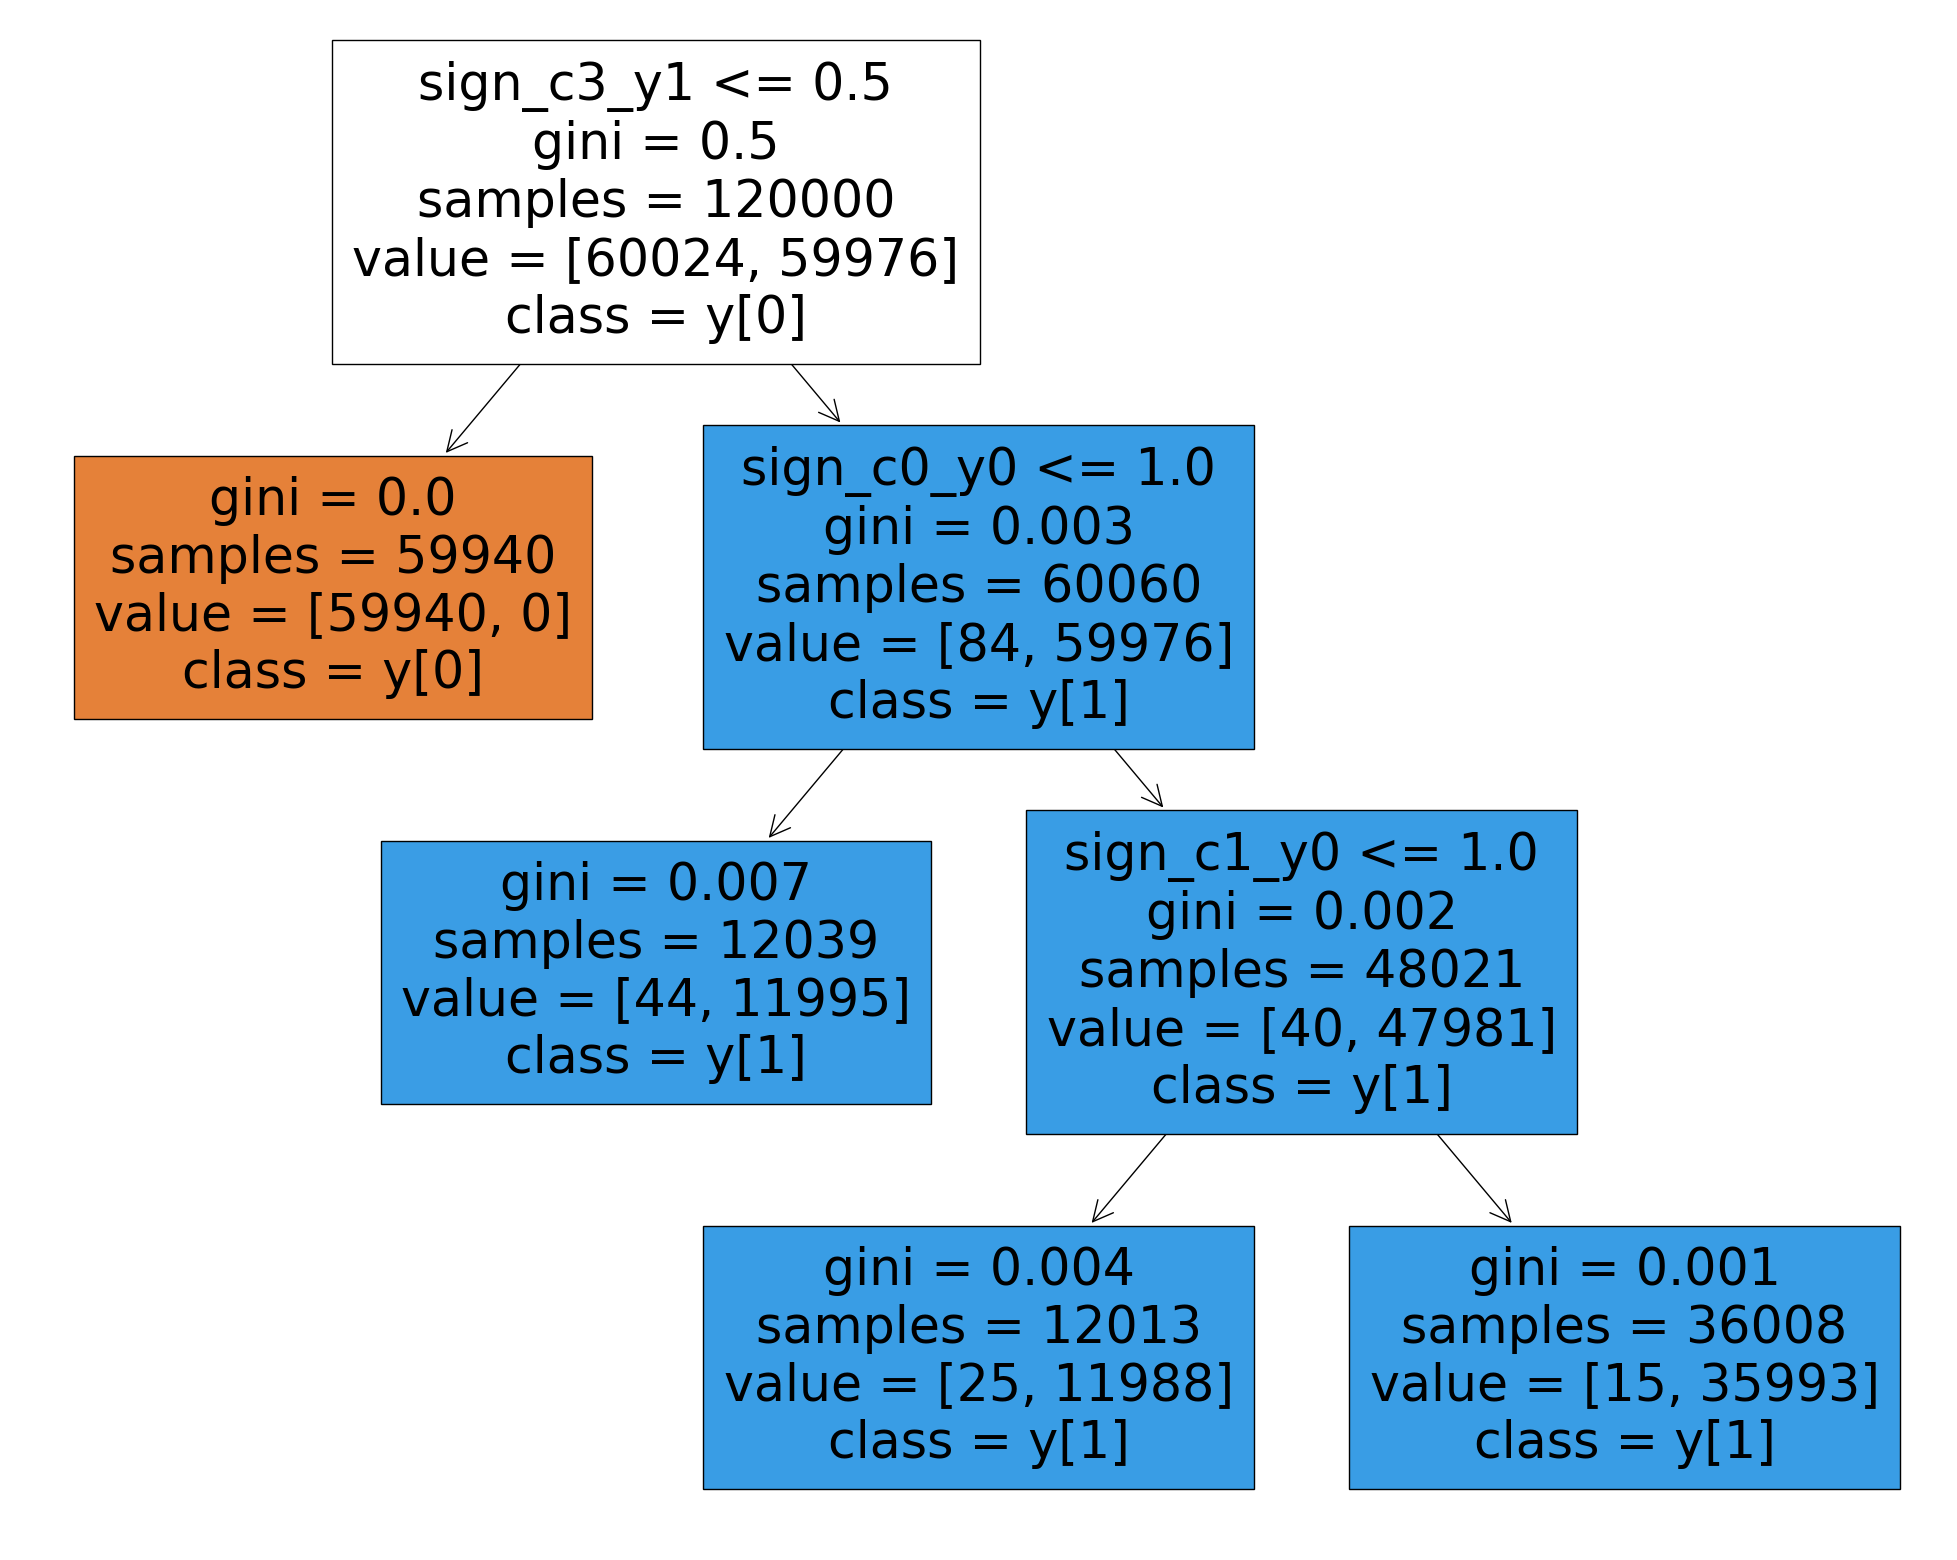

In [10]:
from decision_tree_explain import explain_with_DT

# 1 DT for both classes
clf_funct = explain_with_DT(x_train, concept_encoder, task_predictor)

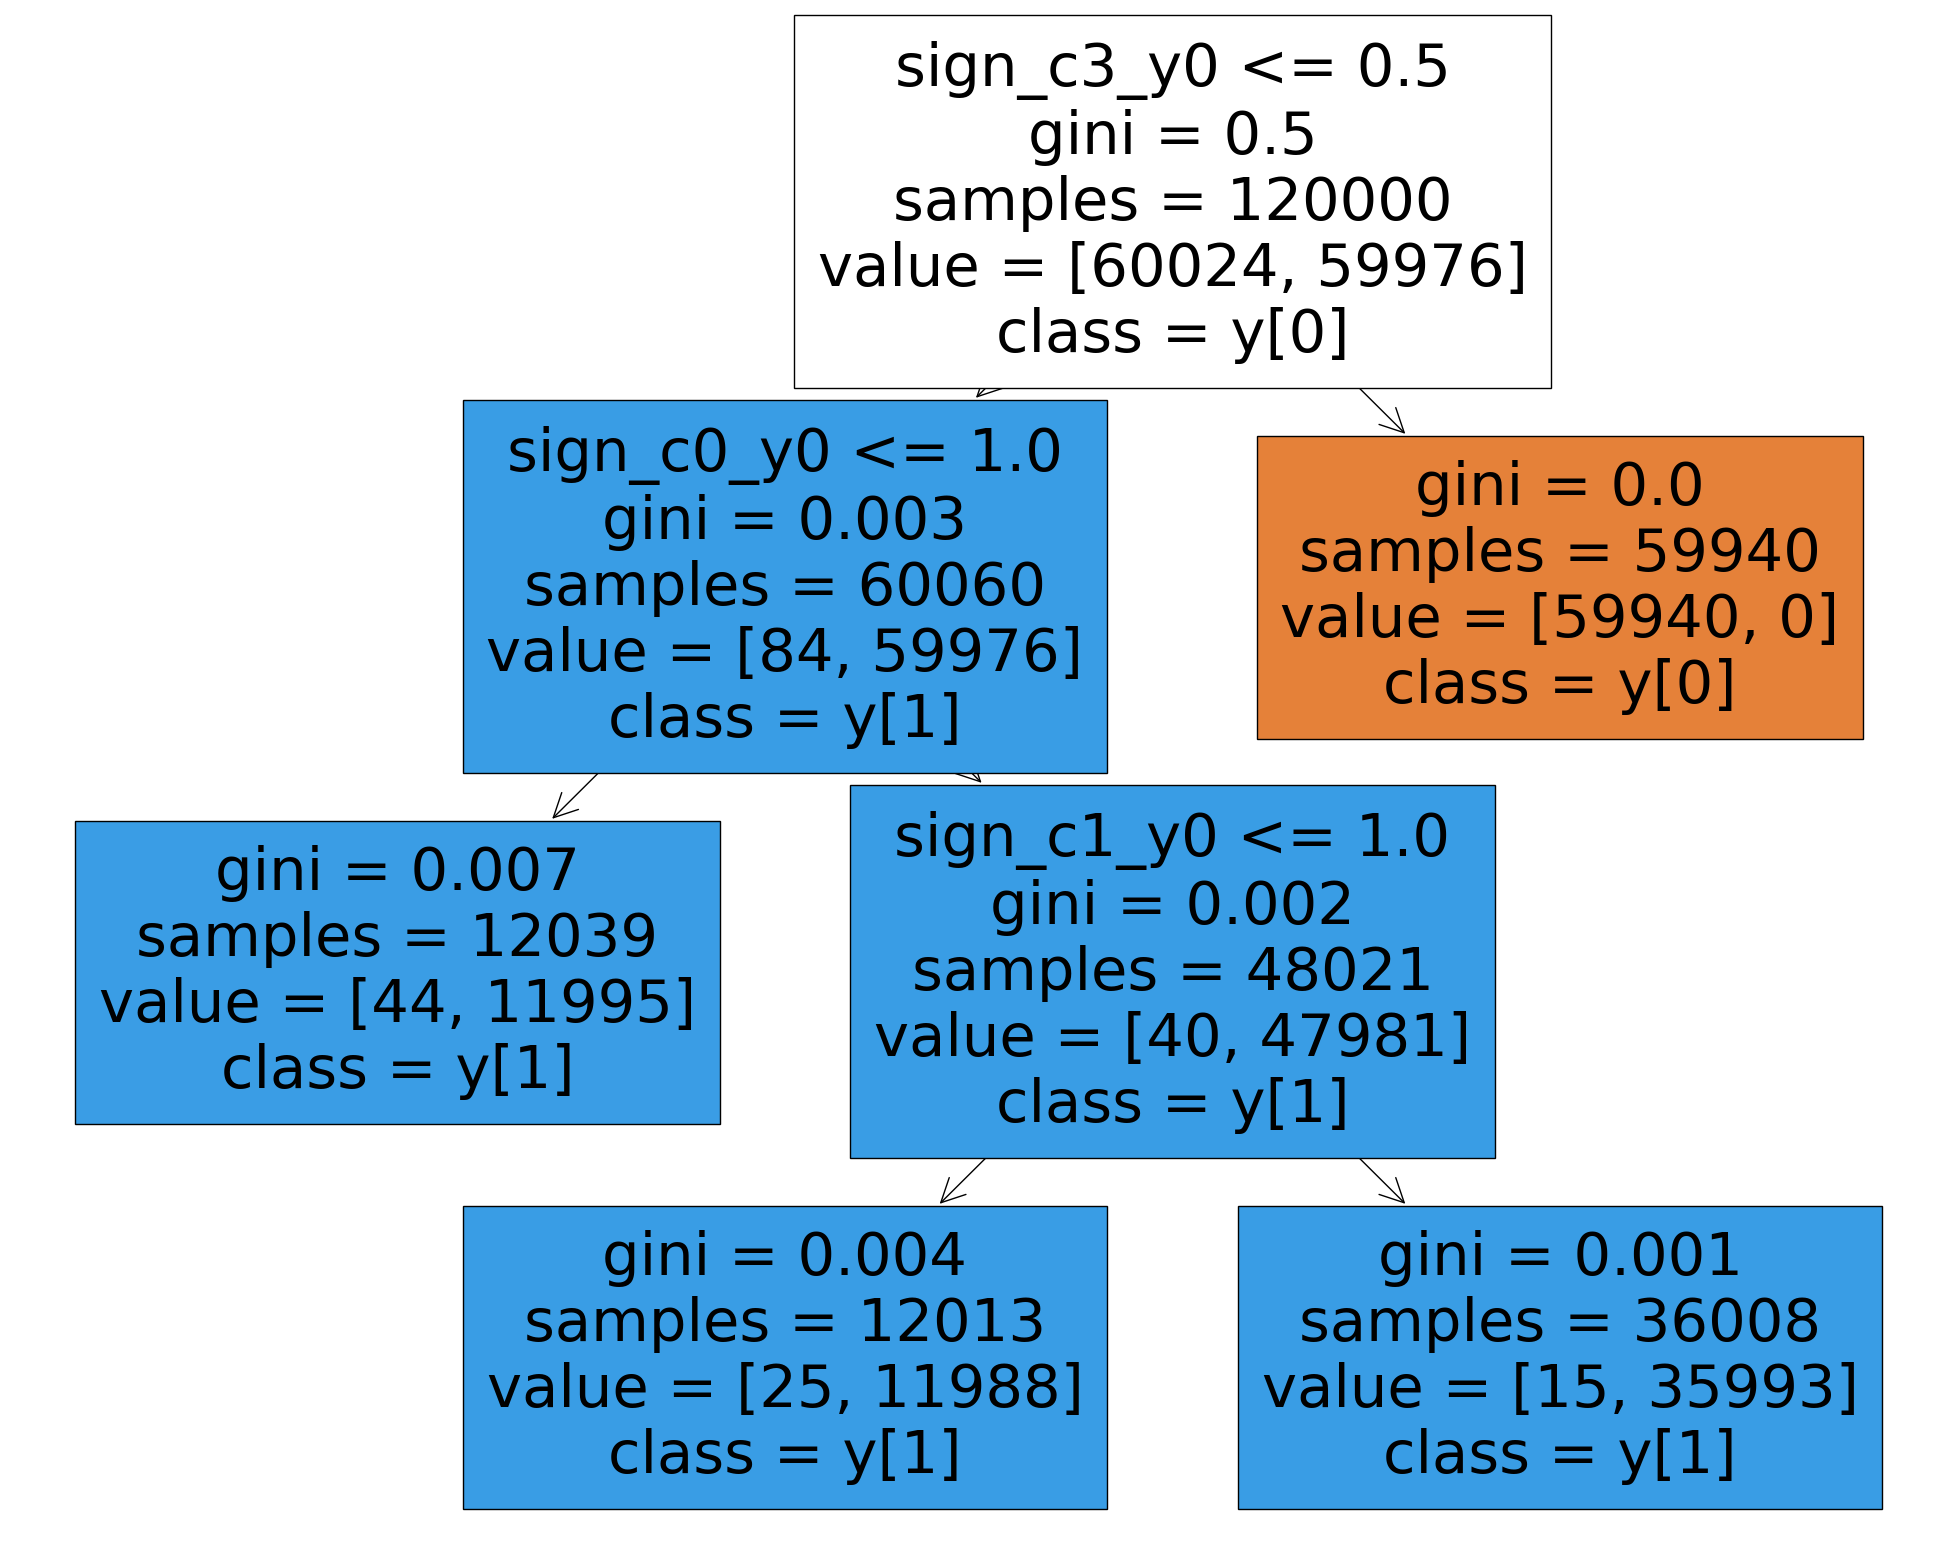

[-1, -1]
[-1, -1]
[-1, -1]
[0.5, -1]
c3
c3


In [11]:
# DT for class 0
clf_funct_0 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=0)

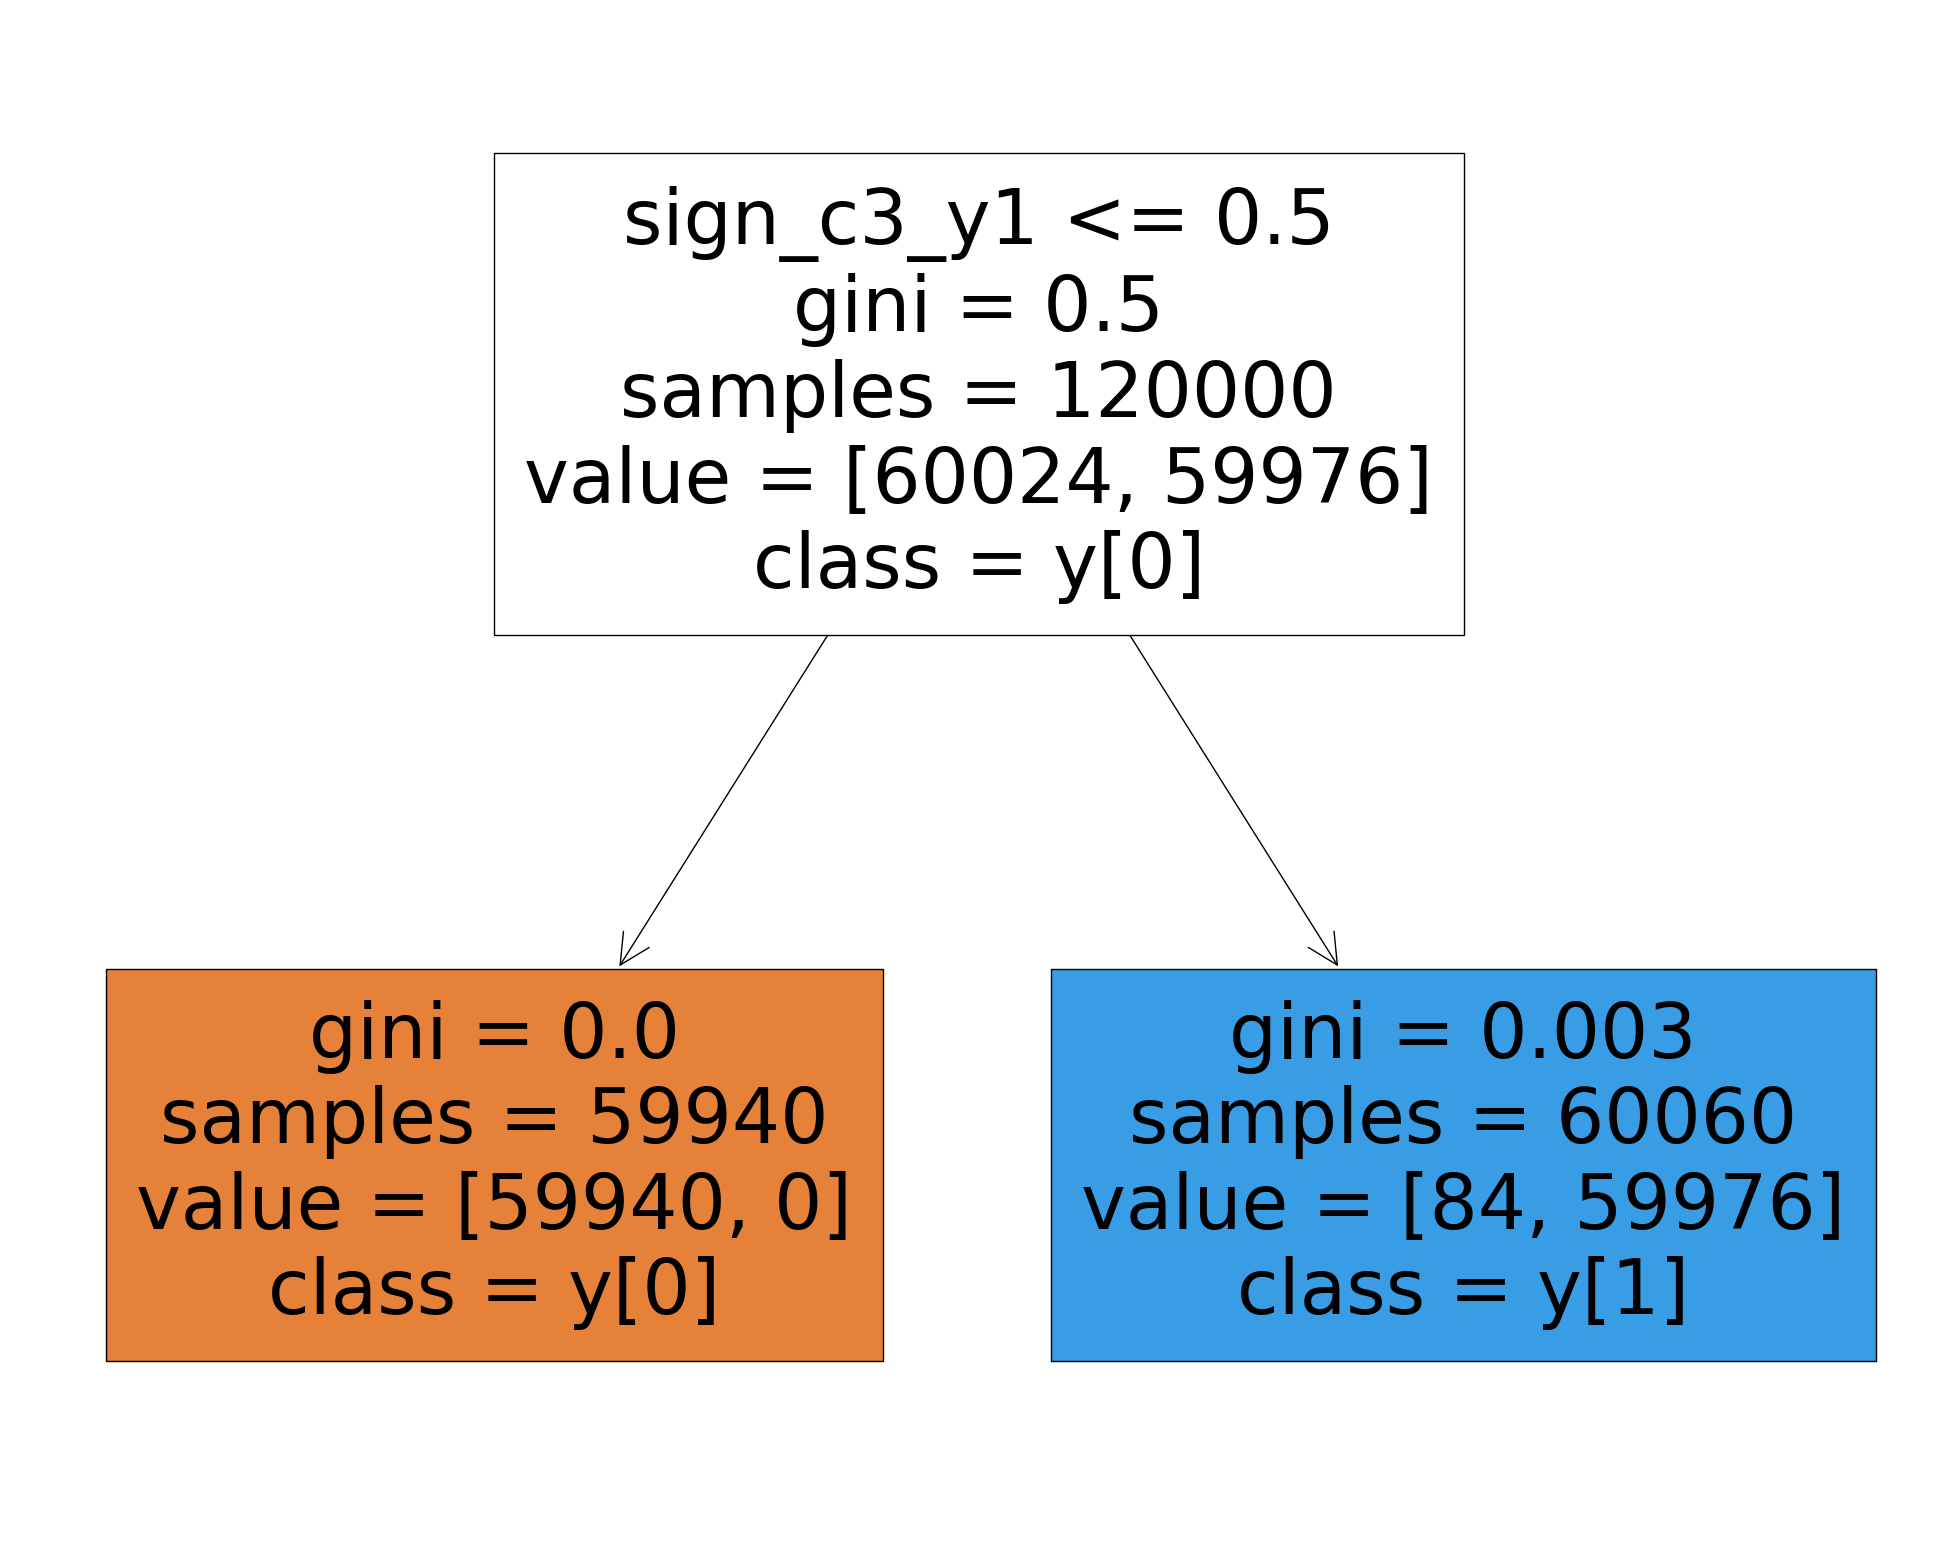

[-1, -1]
[-1, -1]
[-1, -1]
[-1, 0.5]
~c3
~c3


In [12]:
# DT for class 1
clf_funct_1 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=1)

## **XOR**

In [3]:
x, c, y = xor(150000)
x_train, x_test, c_train, c_test, y_train, y_test = train_test_split(x, c, y, test_size=0.2, random_state=SEED)

y_train = F.one_hot(y_train.long().ravel()).float()
y_test = F.one_hot(y_test.long().ravel()).float()

In [4]:
embedding_size = 8 # Each concept will be made of 8 embeddings
concept_encoder = torch.nn.Sequential(
    torch.nn.Linear(in_features=x.shape[1], out_features=10),
    torch.nn.LeakyReLU(),
    ConceptEmbedding(in_features=10, n_concepts=c.shape[1], emb_size=embedding_size),
)
task_predictor = ConceptReasoningLayer(embedding_size, y_train.shape[1])
model = torch.nn.Sequential(concept_encoder, task_predictor)

Here we load the right model_state_dict. BE CAREFUL!

In [5]:
DIRECTORY = './saved_models_v2/' 
MODEL_DICT = 'model_state_dict_DCRBase_XOR.pth'

model.load_state_dict(torch.load(DIRECTORY+MODEL_DICT))

<All keys matched successfully>

### This part uses the function 'explain_with_DT' that you can find in decision_tree_explain.py. It is more general and should work for every kind of dataset you provide to it

In [6]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

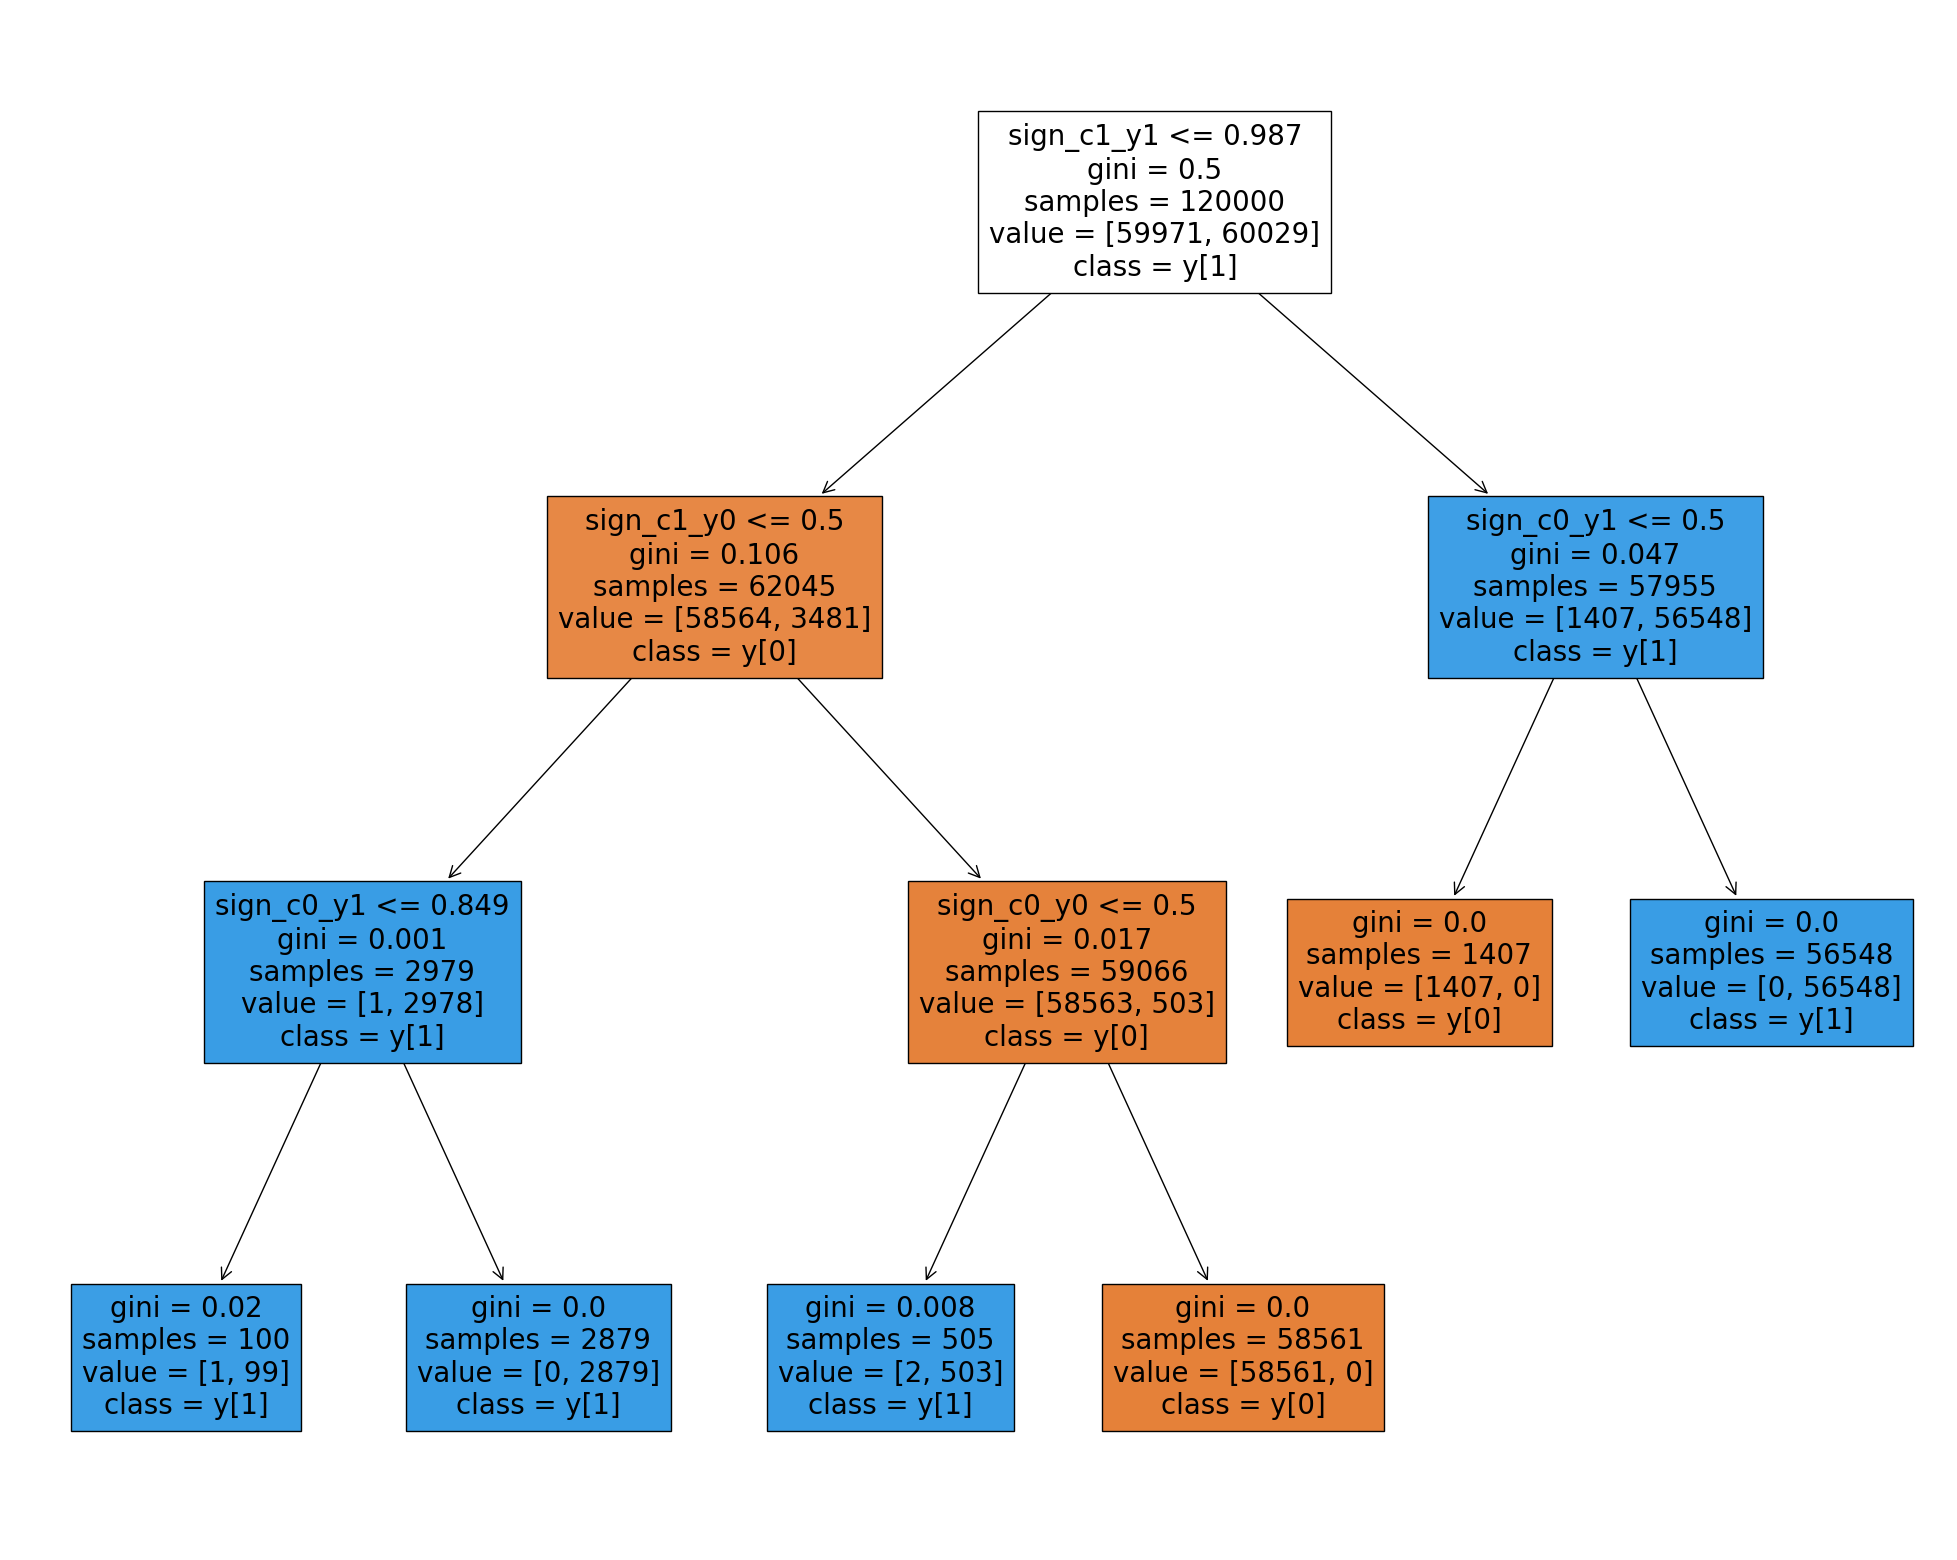

In [7]:
from decision_tree_explain import explain_with_DT

# 1 DT for both classes
clf_funct = explain_with_DT(x_train, concept_encoder, task_predictor)

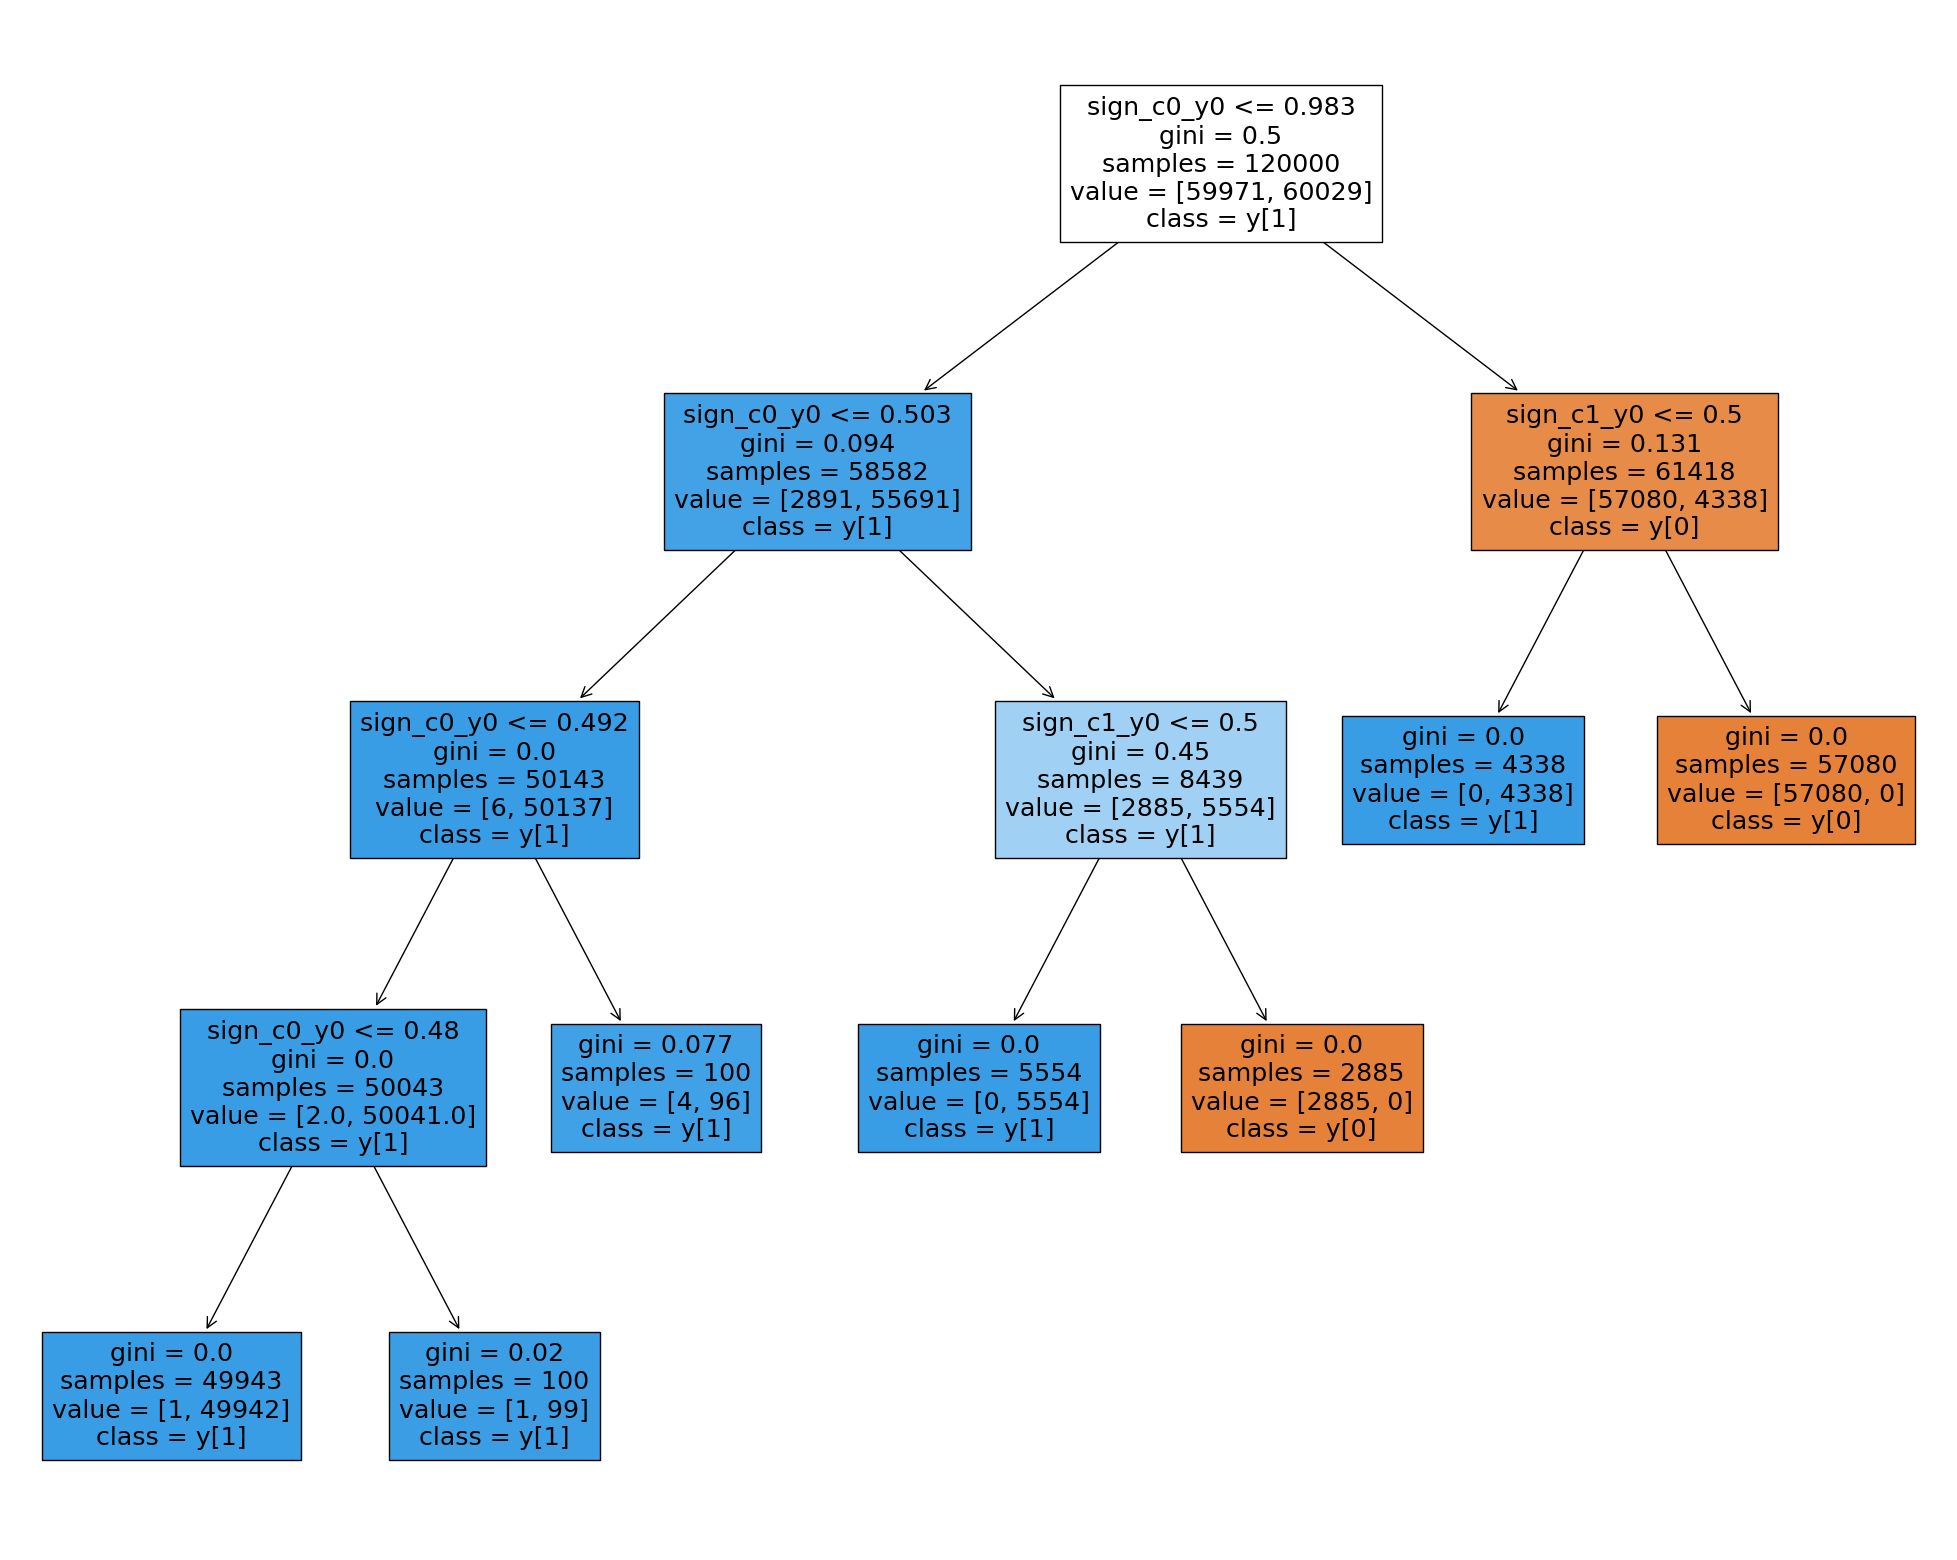

[0.503, 0.983]
[0.5, -1]
[0.983, -1]
[0.5, -1]
c0 & c1|c0 & c1
c0 & c1


In [8]:
# DT for class 0
clf_funct_0 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=0, max_depth=4)

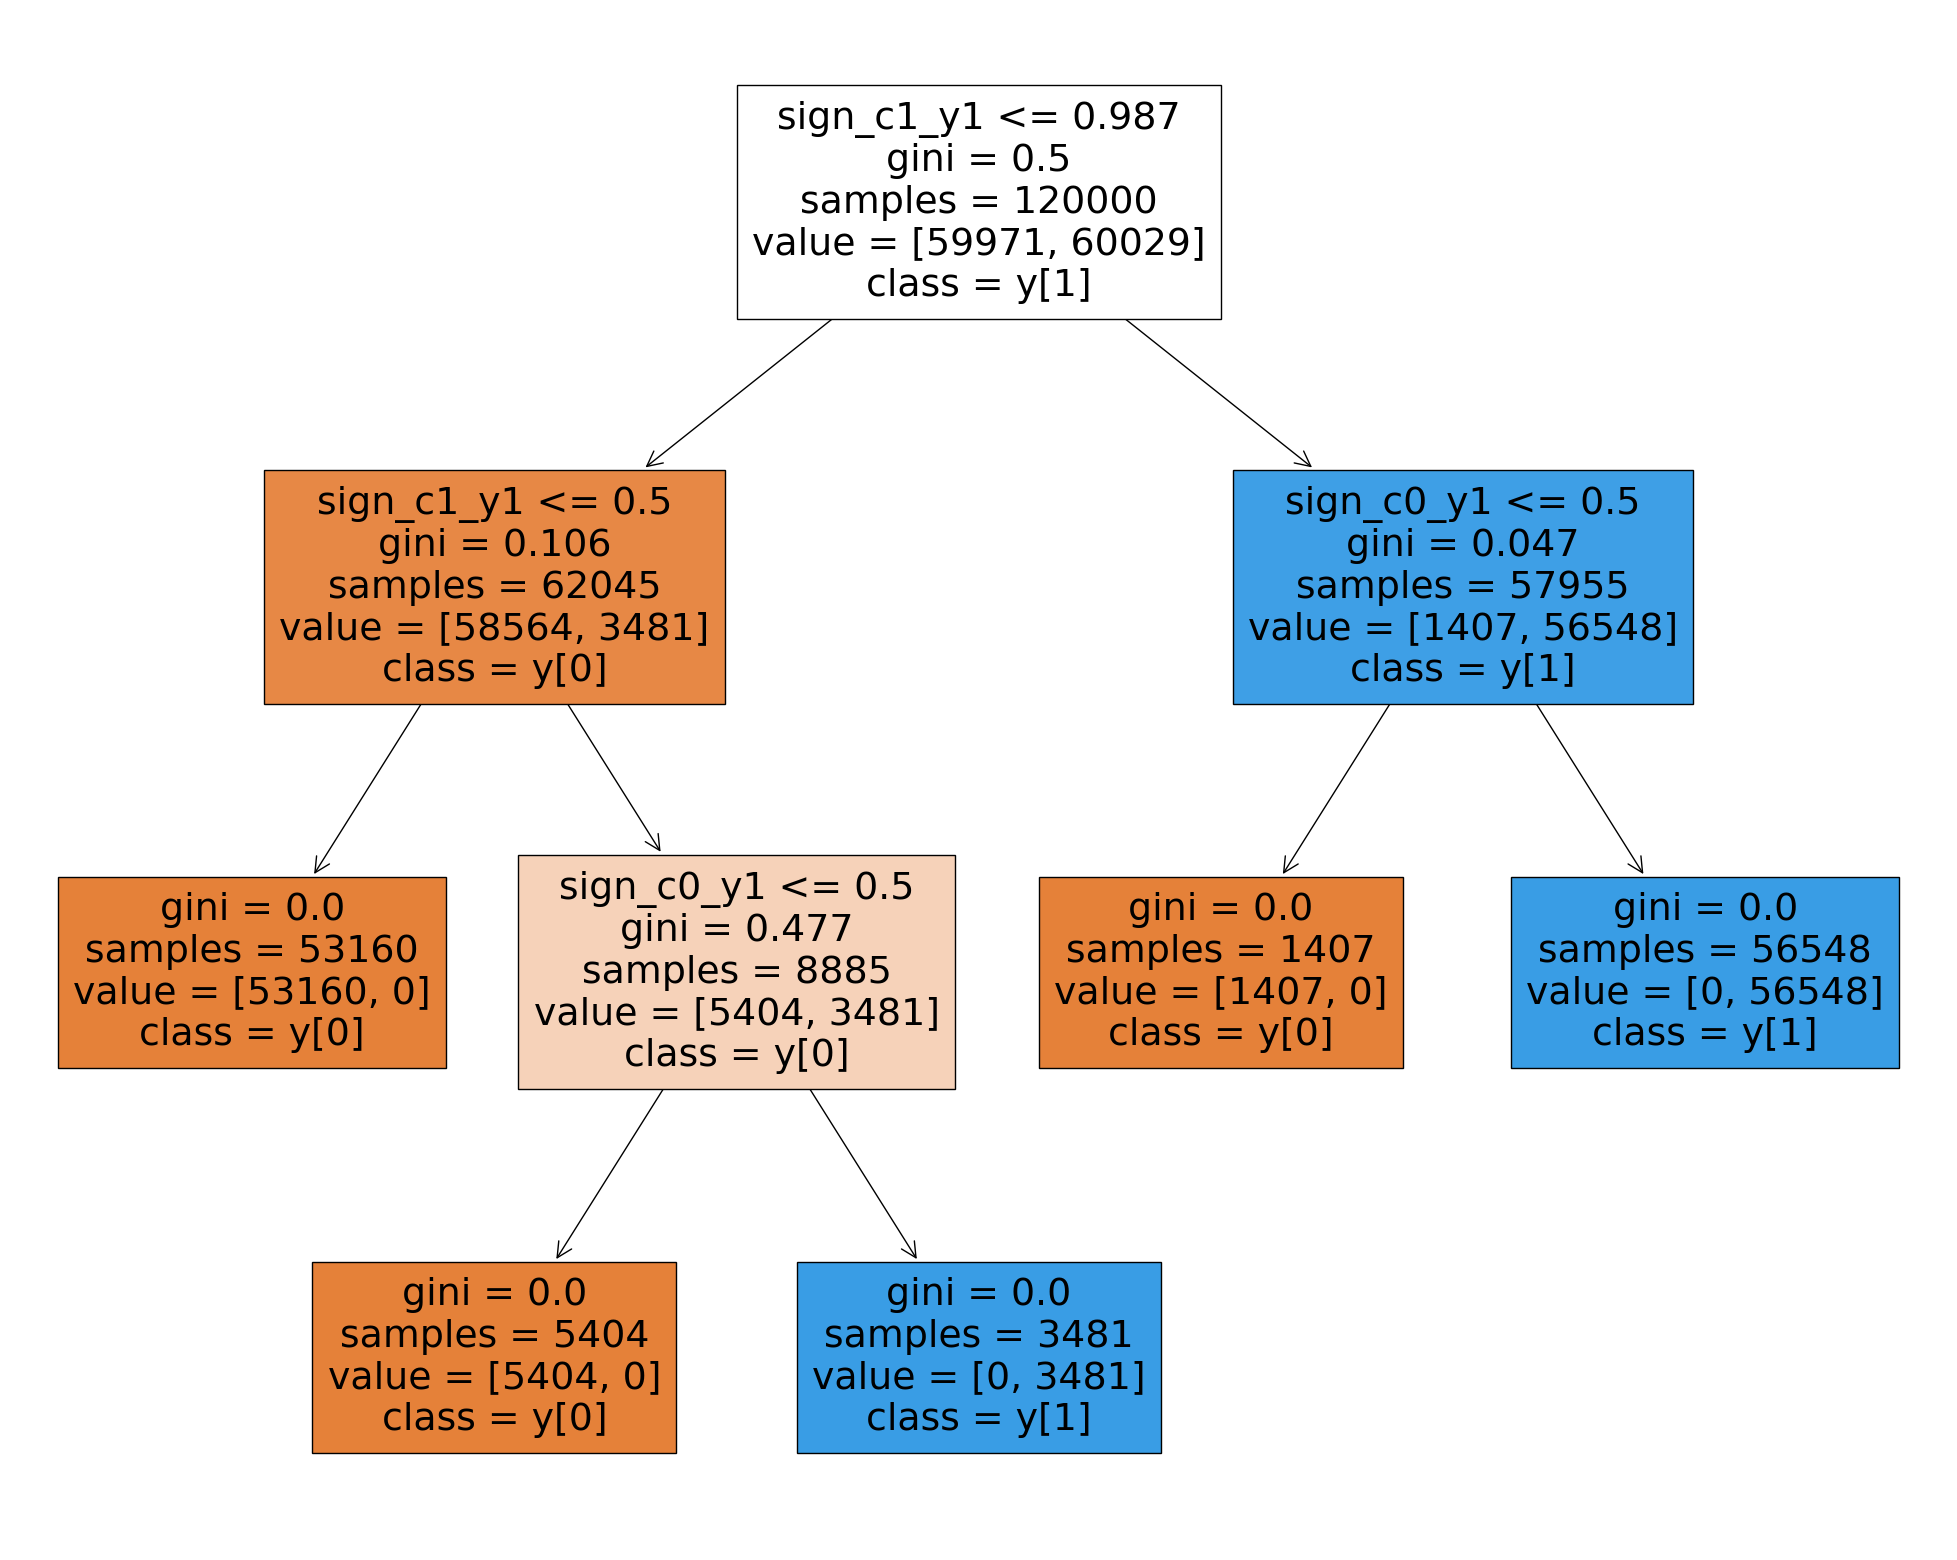

[-1, -1]
[-1, 0.5]
[-1, 0.5]
[0.5, 0.987]
[-1, 0.5]
[0.987, -1]
~c1|~c0 & c1|~c0 & c1
~c0 | ~c1


In [9]:
# DT for class 1
clf_funct_1 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=1, max_depth=6)

## **TRIGONOMETRY**

In [11]:
x, c, y = trigonometry(10000)
x_train, x_test, c_train, c_test, y_train, y_test = train_test_split(x, c, y, test_size=0.2, random_state=SEED)

y_train = F.one_hot(y_train.long().ravel()).float()
y_test = F.one_hot(y_test.long().ravel()).float()

In [12]:
embedding_size = 8 # Each concept will be made of 8 embeddings
concept_encoder = torch.nn.Sequential(
    torch.nn.Linear(in_features=x.shape[1], out_features=10),
    torch.nn.LeakyReLU(),
    ConceptEmbedding(in_features=10, n_concepts=c.shape[1], emb_size=embedding_size),
)
task_predictor = ConceptReasoningLayer(embedding_size, y_train.shape[1])
model = torch.nn.Sequential(concept_encoder, task_predictor)

Here we load the right model_state_dict. BE CAREFUL!

In [13]:
DIRECTORY = './saved_models_v2/' 
MODEL_DICT = 'model_state_dict_DCRBase_Trigonometry.pth'

model.load_state_dict(torch.load(DIRECTORY+MODEL_DICT))

<All keys matched successfully>

In [21]:
c_emb, c_pred = concept_encoder(x_test)
global_ex = task_predictor.explain(c_emb, c_pred, 'global')
global_ex

[{'class': 'y_0', 'explanation': 'c_0 & ~c_1 & ~c_2', 'count': 240},
 {'class': 'y_0', 'explanation': '~c_0 & ~c_1 & ~c_2', 'count': 235},
 {'class': 'y_0', 'explanation': '~c_0 & c_1 & ~c_2', 'count': 233},
 {'class': 'y_0', 'explanation': 'c_0 & ~c_1 & c_2', 'count': 90},
 {'class': 'y_0', 'explanation': '~c_0 & ~c_1 & c_2', 'count': 241},
 {'class': 'y_0', 'explanation': '~c_0 & c_1 & c_2', 'count': 116},
 {'class': 'y_0', 'explanation': 'c_0 & c_1 & ~c_2', 'count': 82},
 {'class': 'y_0', 'explanation': 'c_0 & c_1 & c_2', 'count': 2},
 {'class': 'y_1', 'explanation': 'c_0 & c_1 & c_2', 'count': 255},
 {'class': 'y_1', 'explanation': '~c_0 & c_1 & c_2', 'count': 182}]

In [23]:
gex0 = [item['explanation'] for item in global_ex if item['class'] == 'y_0']
gex1 = [item['explanation'] for item in global_ex if item['class'] == 'y_1']
aggregated_exp0 = "|".join(gex0)
aggregated_exp1 = "|".join(gex1)

from sympy.logic.boolalg import to_dnf
to_dnf(aggregated_exp0, simplify=True)

['c_0 & ~c_1 & ~c_2', '~c_0 & ~c_1 & ~c_2', '~c_0 & c_1 & ~c_2', 'c_0 & ~c_1 & c_2', '~c_0 & ~c_1 & c_2', '~c_0 & c_1 & c_2', 'c_0 & c_1 & ~c_2', 'c_0 & c_1 & c_2']


True

In [16]:
to_dnf(aggregated_exp1, simplify=True)

c_1 & c_2

### This part uses the function 'explain_with_DT' that you can find in decision_tree_explain.py. It is more general and should work for every kind of dataset you provide to it

In [17]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

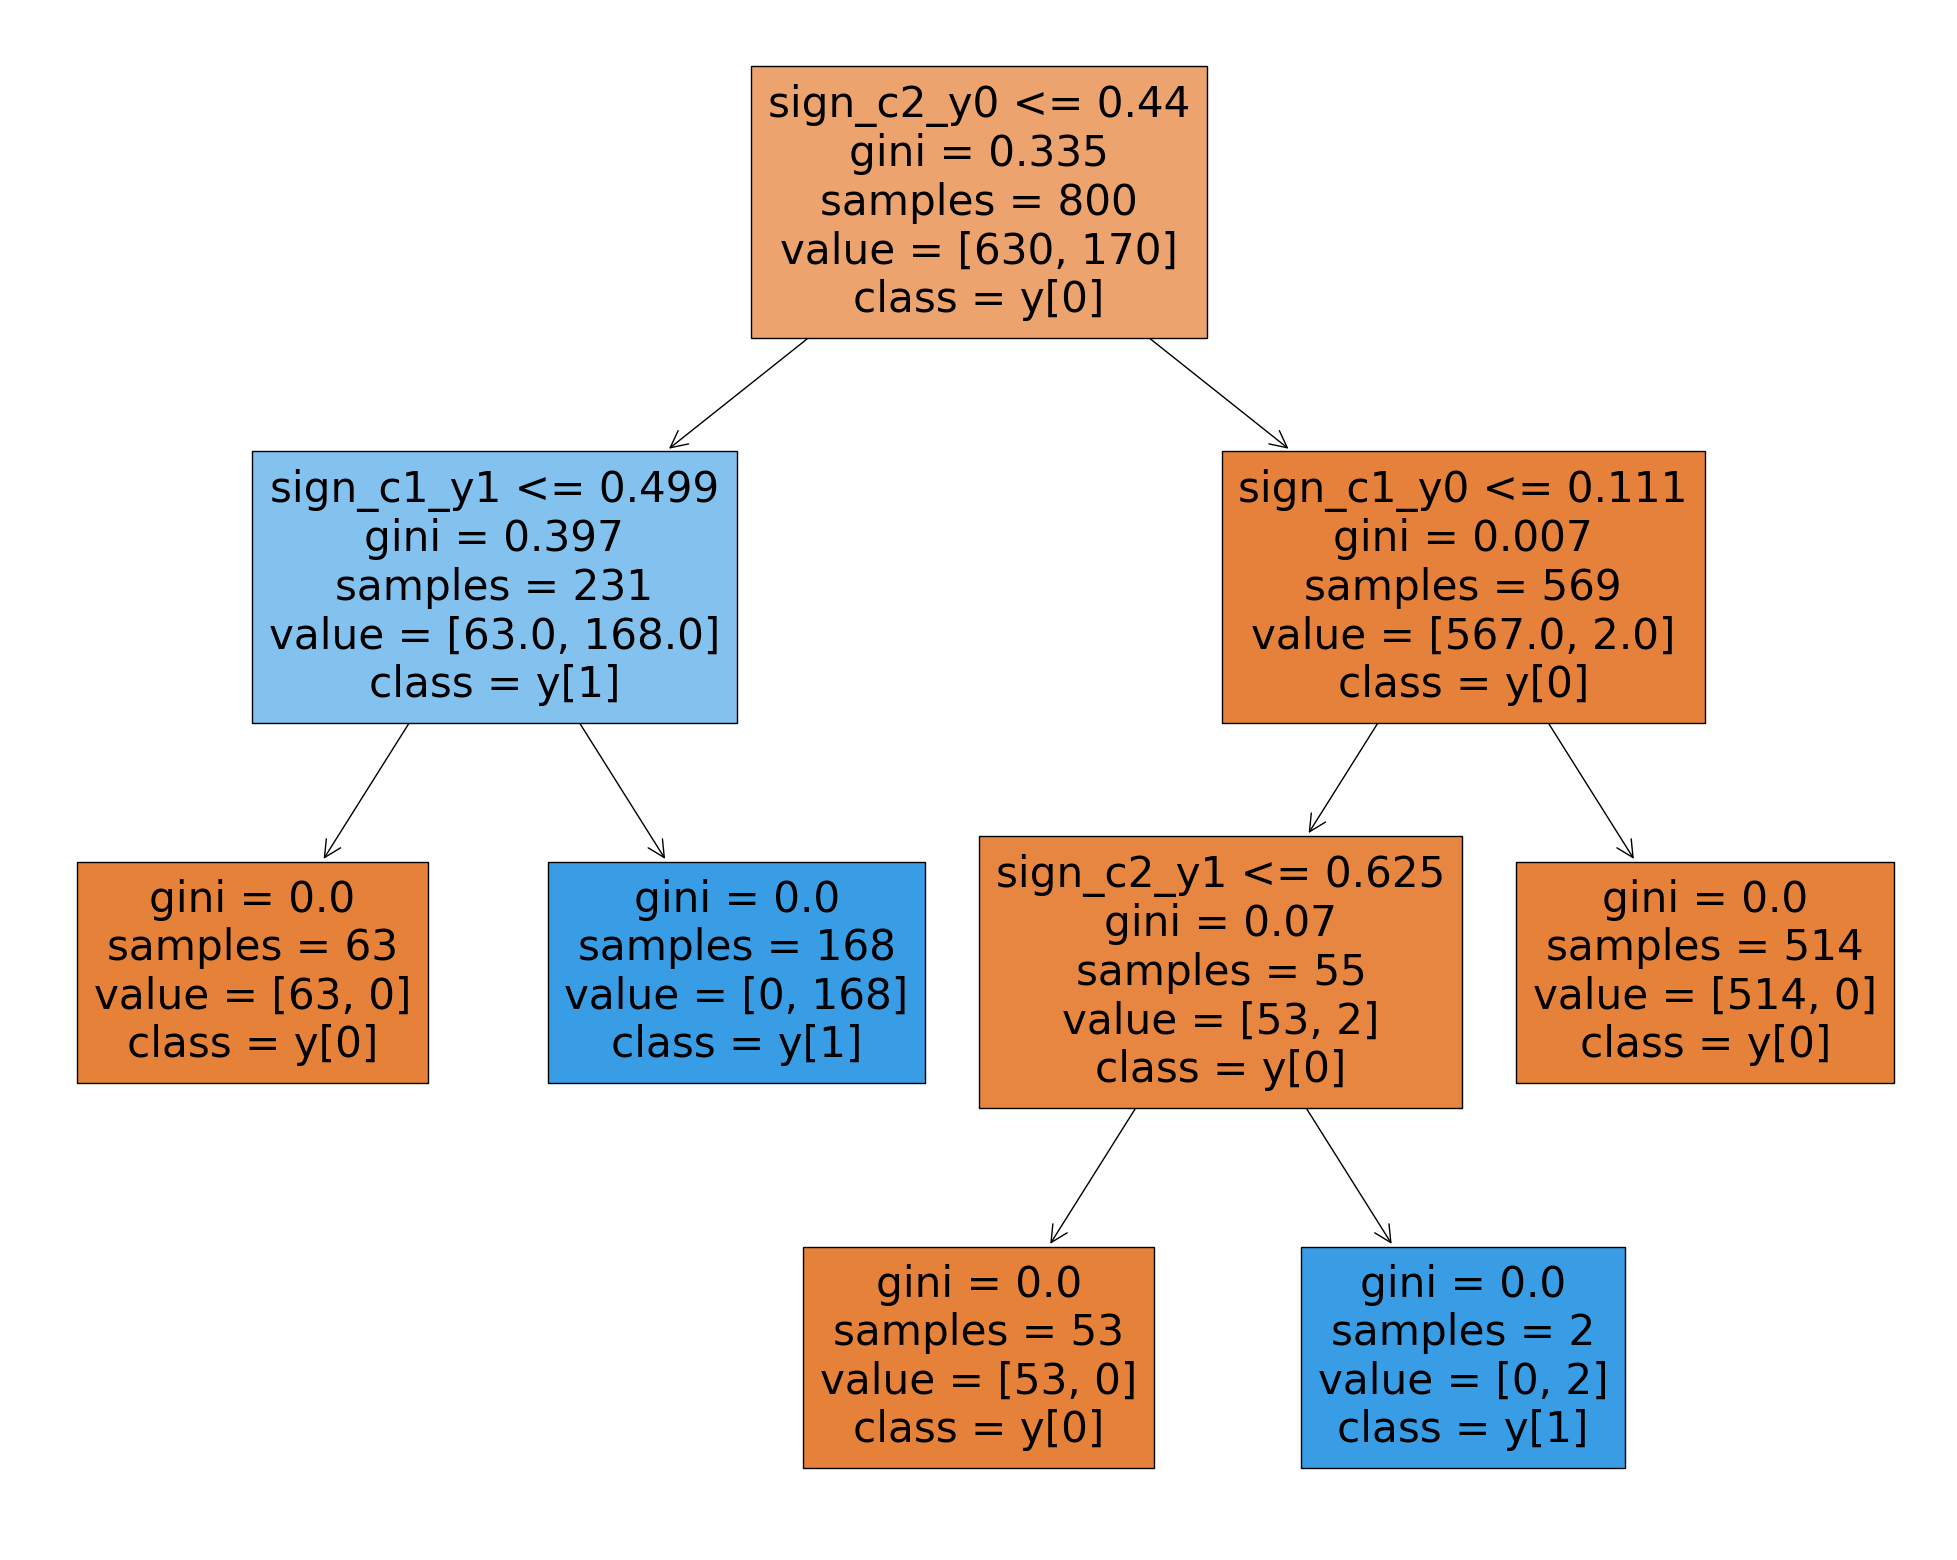

In [10]:
from decision_tree_explain import explain_with_DT

# 1 DT for both classes
clf_funct = explain_with_DT(x_train, concept_encoder, task_predictor)

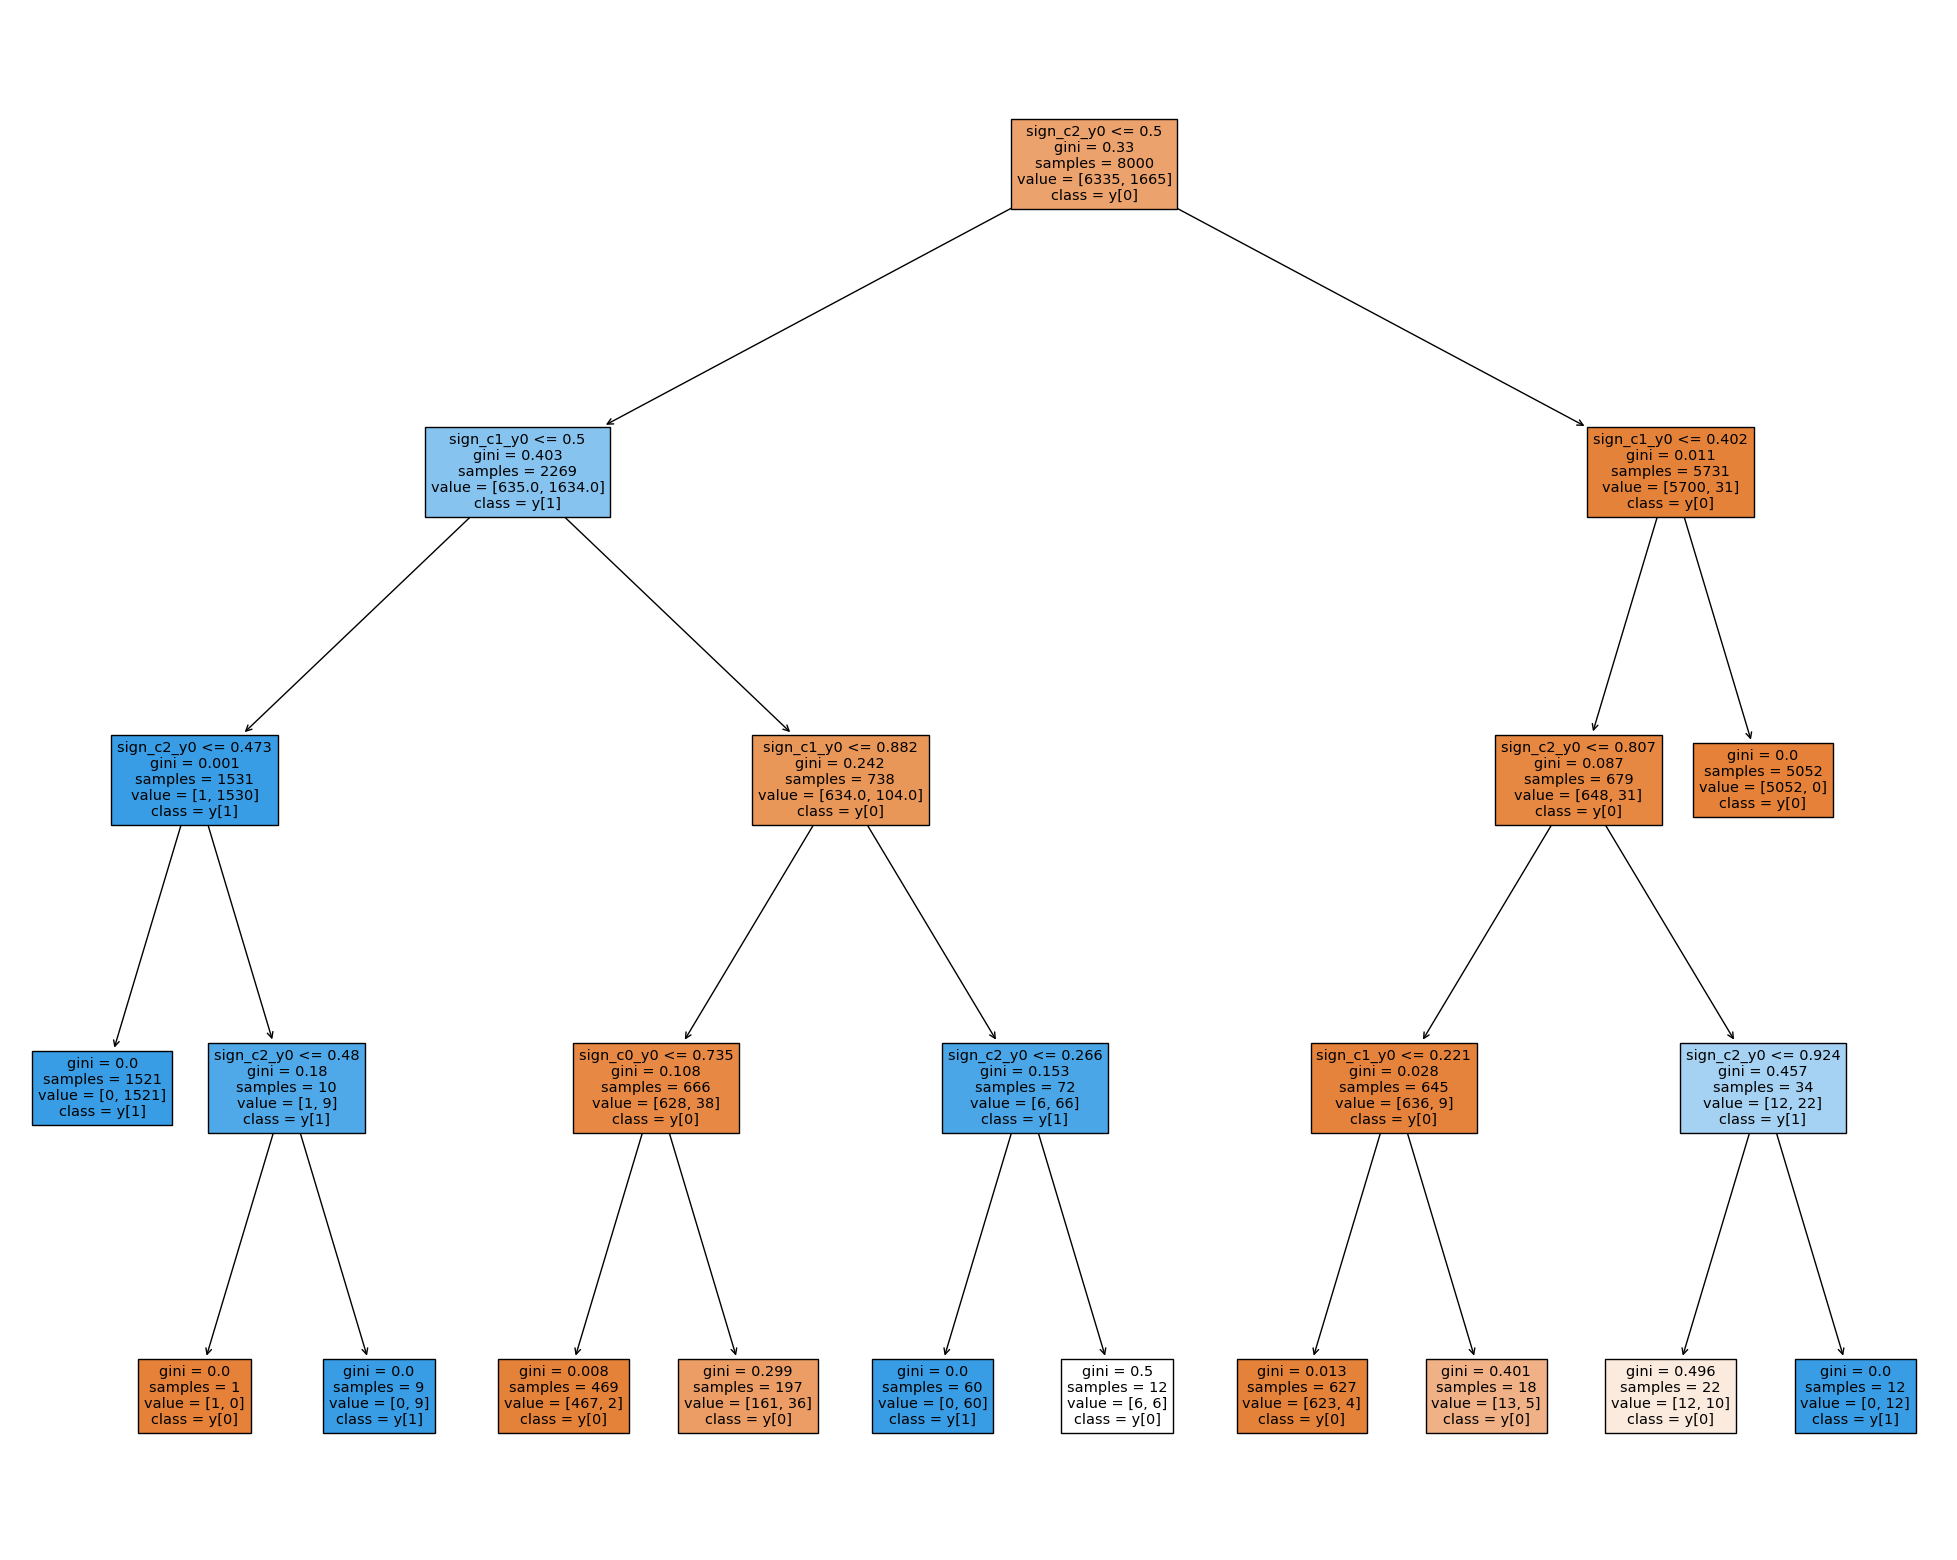

[-1, -1]
[-1, 0.5]
[0.473, 0.48]
[-1, 0.735]
[0.5, 0.882]
[-1, 0.5]
[0.735, -1]
[0.5, 0.882]
[-1, 0.5]
[-1, -1]
[0.882, -1]
[0.266, 0.5]
[-1, -1]
[-1, 0.221]
[0.5, 0.807]
[-1, -1]
[0.221, 0.402]
[0.5, 0.807]
[-1, -1]
[-1, 0.402]
[0.807, 0.924]
[-1, -1]
[0.402, -1]
[0.5, -1]
~c1 & ~c2|~c0 & c1 & ~c2|c0 & c1 & ~c2|c1 & ~c2|~c1 & c2|~c1 & c2|~c1 & c2|c1 & c2
True


In [19]:
# DT for class 0
clf_funct_0 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=0, max_depth=4)

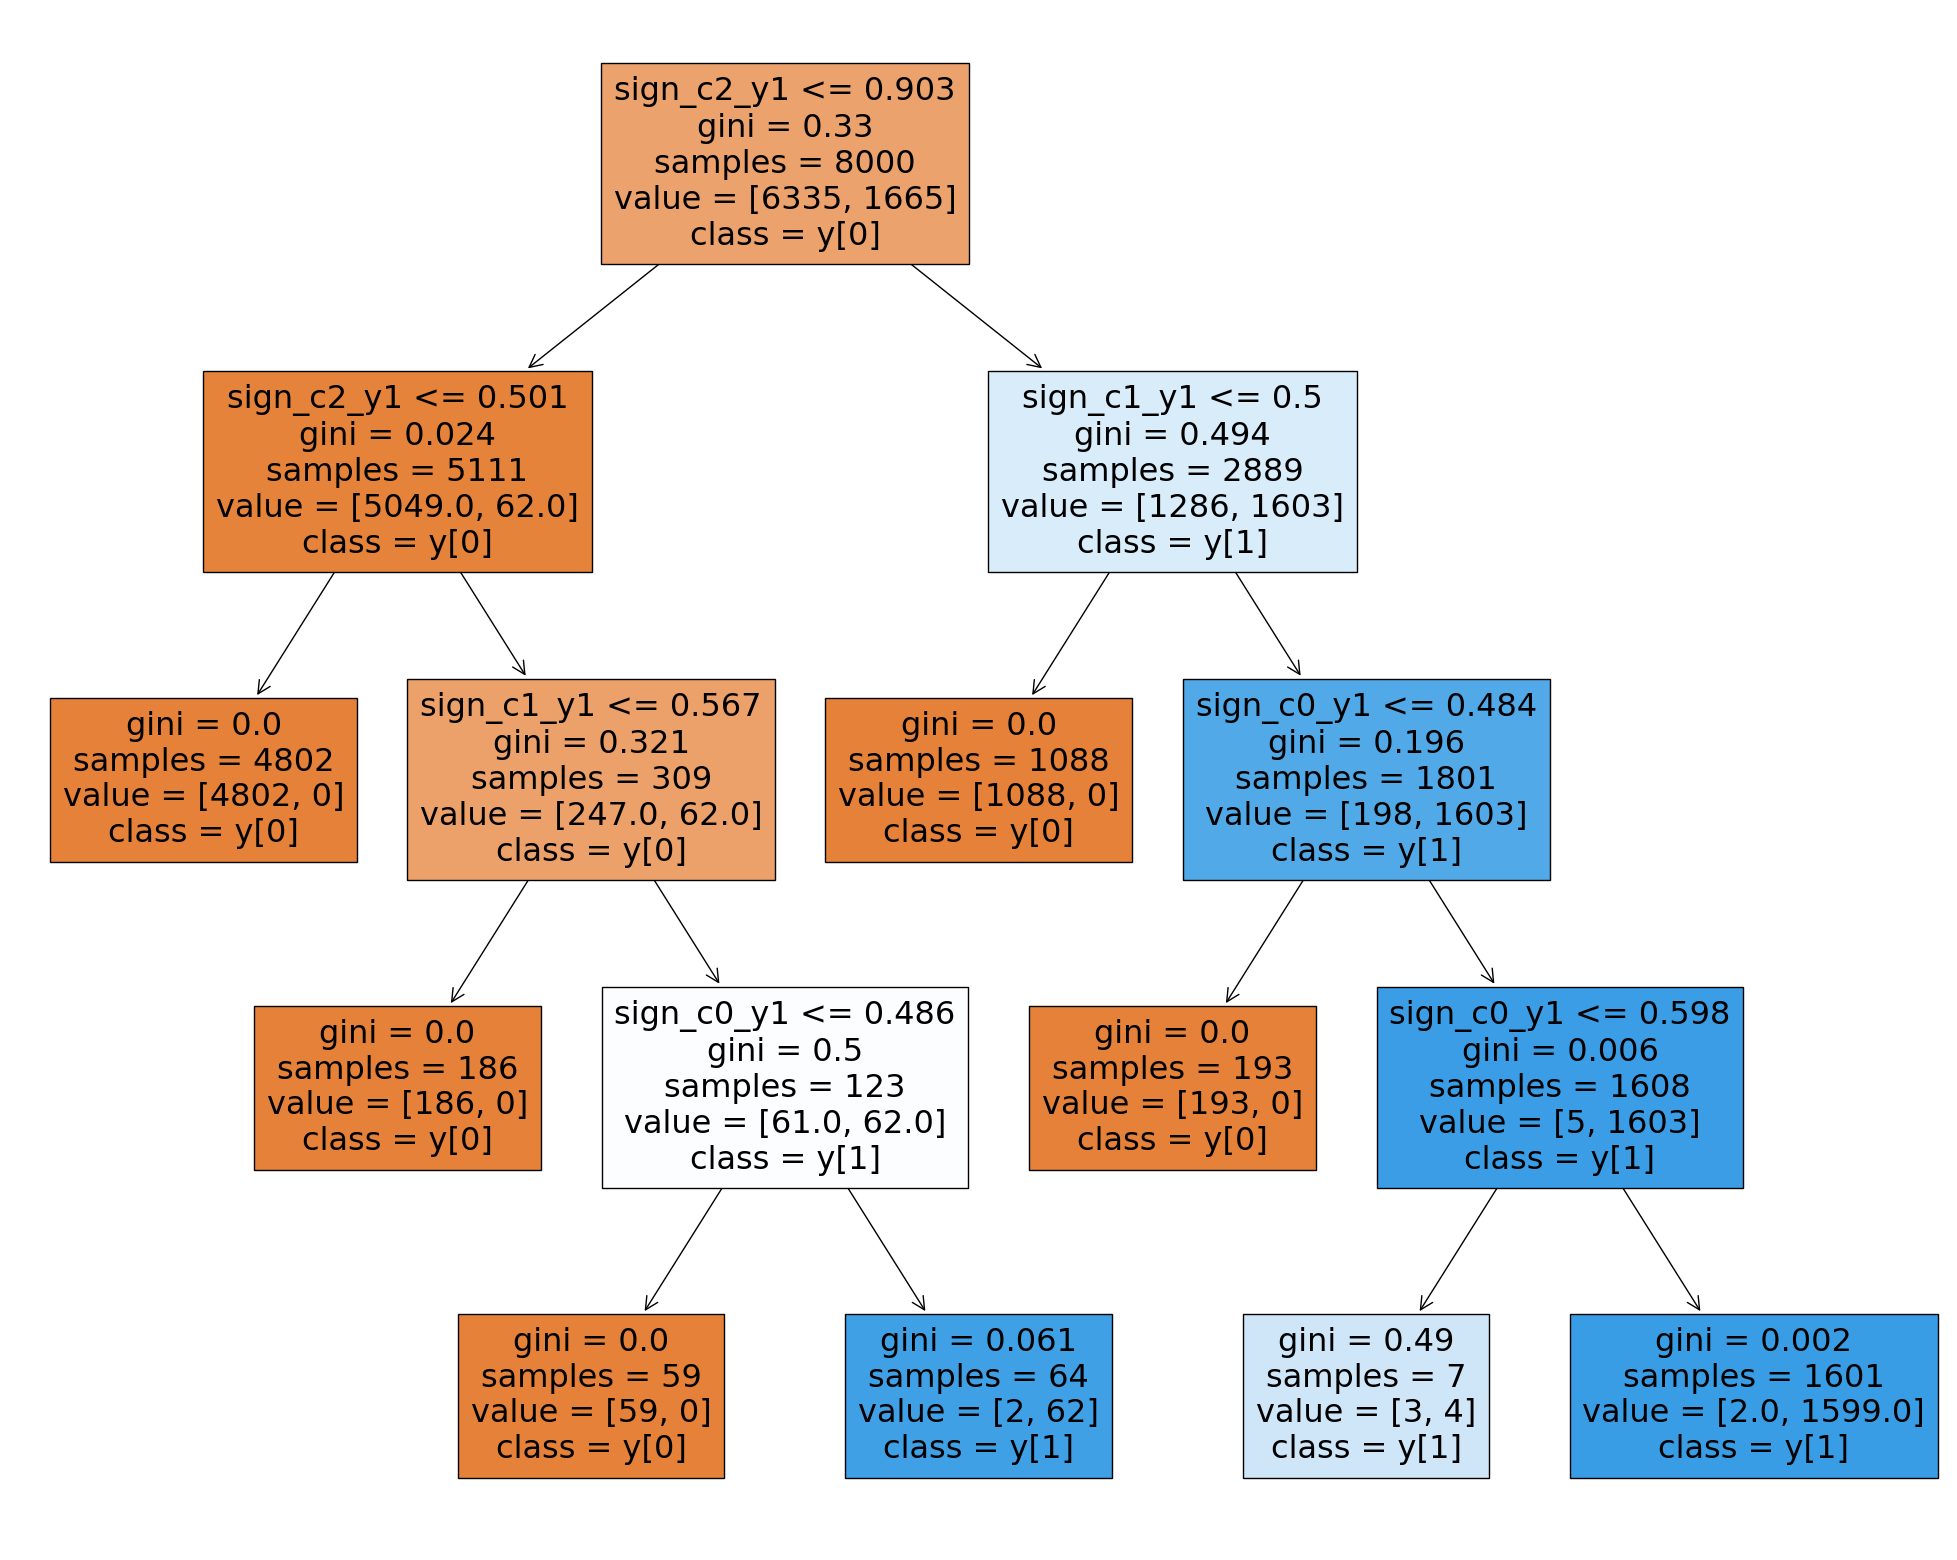

[-1, -1]
[-1, -1]
[-1, 0.501]
[-1, -1]
[-1, 0.567]
[0.501, 0.903]
[-1, 0.486]
[0.567, -1]
[0.501, 0.903]
[-1, -1]
[-1, 0.5]
[0.903, -1]
[-1, 0.484]
[0.5, -1]
[0.903, -1]
~c2|~c1 & c2|~c0 & c1 & c2|~c1 & c2|~c0 & c1 & c2
~c0 | ~c1 | ~c2


In [24]:
# DT for class 1
clf_funct_1 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=1, max_depth=4)

## **MUX41**

In [57]:
x, c, y = mux41(150000)
x_train, x_test, c_train, c_test, y_train, y_test = train_test_split(x, c, y, test_size=0.2, random_state=SEED)

y_train = F.one_hot(y_train.long().ravel()).float()
y_test = F.one_hot(y_test.long().ravel()).float()

In [58]:
embedding_size = 8 # Each concept will be made of 8 embeddings
concept_encoder = torch.nn.Sequential(
    torch.nn.Linear(in_features=x.shape[1], out_features=10),
    torch.nn.LeakyReLU(),
    ConceptEmbedding(in_features=10, n_concepts=c.shape[1], emb_size=embedding_size),
)
task_predictor = ConceptReasoningLayer(embedding_size, y_train.shape[1])
model = torch.nn.Sequential(concept_encoder, task_predictor)

Here we load the right model_state_dict. BE CAREFUL!

In [59]:
DIRECTORY = './saved_models_v2/' 
MODEL_DICT = 'model_state_dict_DCRBase_Mux41.pth'

model.load_state_dict(torch.load(DIRECTORY+MODEL_DICT))

<All keys matched successfully>

In [60]:
c_emb, c_pred = concept_encoder(x_test)
global_ex = task_predictor.explain(c_emb, c_pred, 'global')
global_ex

[{'class': 'y_0',
  'explanation': '~c_0 & c_1 & ~c_2 & c_3 & c_4 & ~c_5',
  'count': 432},
 {'class': 'y_0',
  'explanation': '~c_0 & ~c_1 & c_2 & c_3 & ~c_4 & c_5',
  'count': 492},
 {'class': 'y_0',
  'explanation': 'c_0 & ~c_1 & ~c_2 & c_3 & ~c_4 & c_5',
  'count': 472},
 {'class': 'y_0',
  'explanation': '~c_0 & ~c_1 & c_2 & c_3 & ~c_4 & ~c_5',
  'count': 435},
 {'class': 'y_0',
  'explanation': 'c_0 & c_1 & ~c_2 & ~c_3 & c_4 & c_5',
  'count': 457},
 {'class': 'y_0',
  'explanation': 'c_0 & ~c_1 & c_2 & ~c_3 & ~c_4 & c_5',
  'count': 511},
 {'class': 'y_0',
  'explanation': '~c_0 & c_1 & ~c_2 & ~c_3 & c_4 & c_5',
  'count': 481},
 {'class': 'y_0',
  'explanation': '~c_0 & ~c_1 & c_2 & ~c_3 & ~c_4 & c_5',
  'count': 483},
 {'class': 'y_0',
  'explanation': 'c_0 & c_1 & ~c_2 & ~c_3 & c_4 & ~c_5',
  'count': 468},
 {'class': 'y_0',
  'explanation': '~c_0 & ~c_1 & ~c_2 & ~c_3 & c_4 & c_5',
  'count': 451},
 {'class': 'y_0',
  'explanation': '~c_0 & ~c_1 & c_2 & ~c_3 & ~c_4 & ~c_5',
 

In [61]:
gex0 = [item['explanation'] for item in global_ex if item['class'] == 'y_0']
gex1 = [item['explanation'] for item in global_ex if item['class'] == 'y_1']
aggregated_exp0 = "|".join(gex0)
aggregated_exp1 = "|".join(gex1)

from sympy.logic.boolalg import to_dnf
to_dnf(aggregated_exp0, simplify=True)

~c_2 | (c_1 & ~c_4) | (c_4 & ~c_1) | (c_4 & ~c_3) | (c_5 & ~c_1) | (~c_0 & ~c_5)

In [62]:
to_dnf(aggregated_exp1, simplify=True)

(c_1 & c_5) | (c_2 & c_4) | (c_3 & c_5) | (c_2 & ~c_0) | (c_0 & c_1 & c_3) | (~c_4 & ~c_5) | (c_3 & ~c_0 & ~c_1)

### This part uses the function 'explain_with_DT' that you can find in decision_tree_explain.py. It is more general and should work for every kind of dataset you provide to it

In [63]:
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

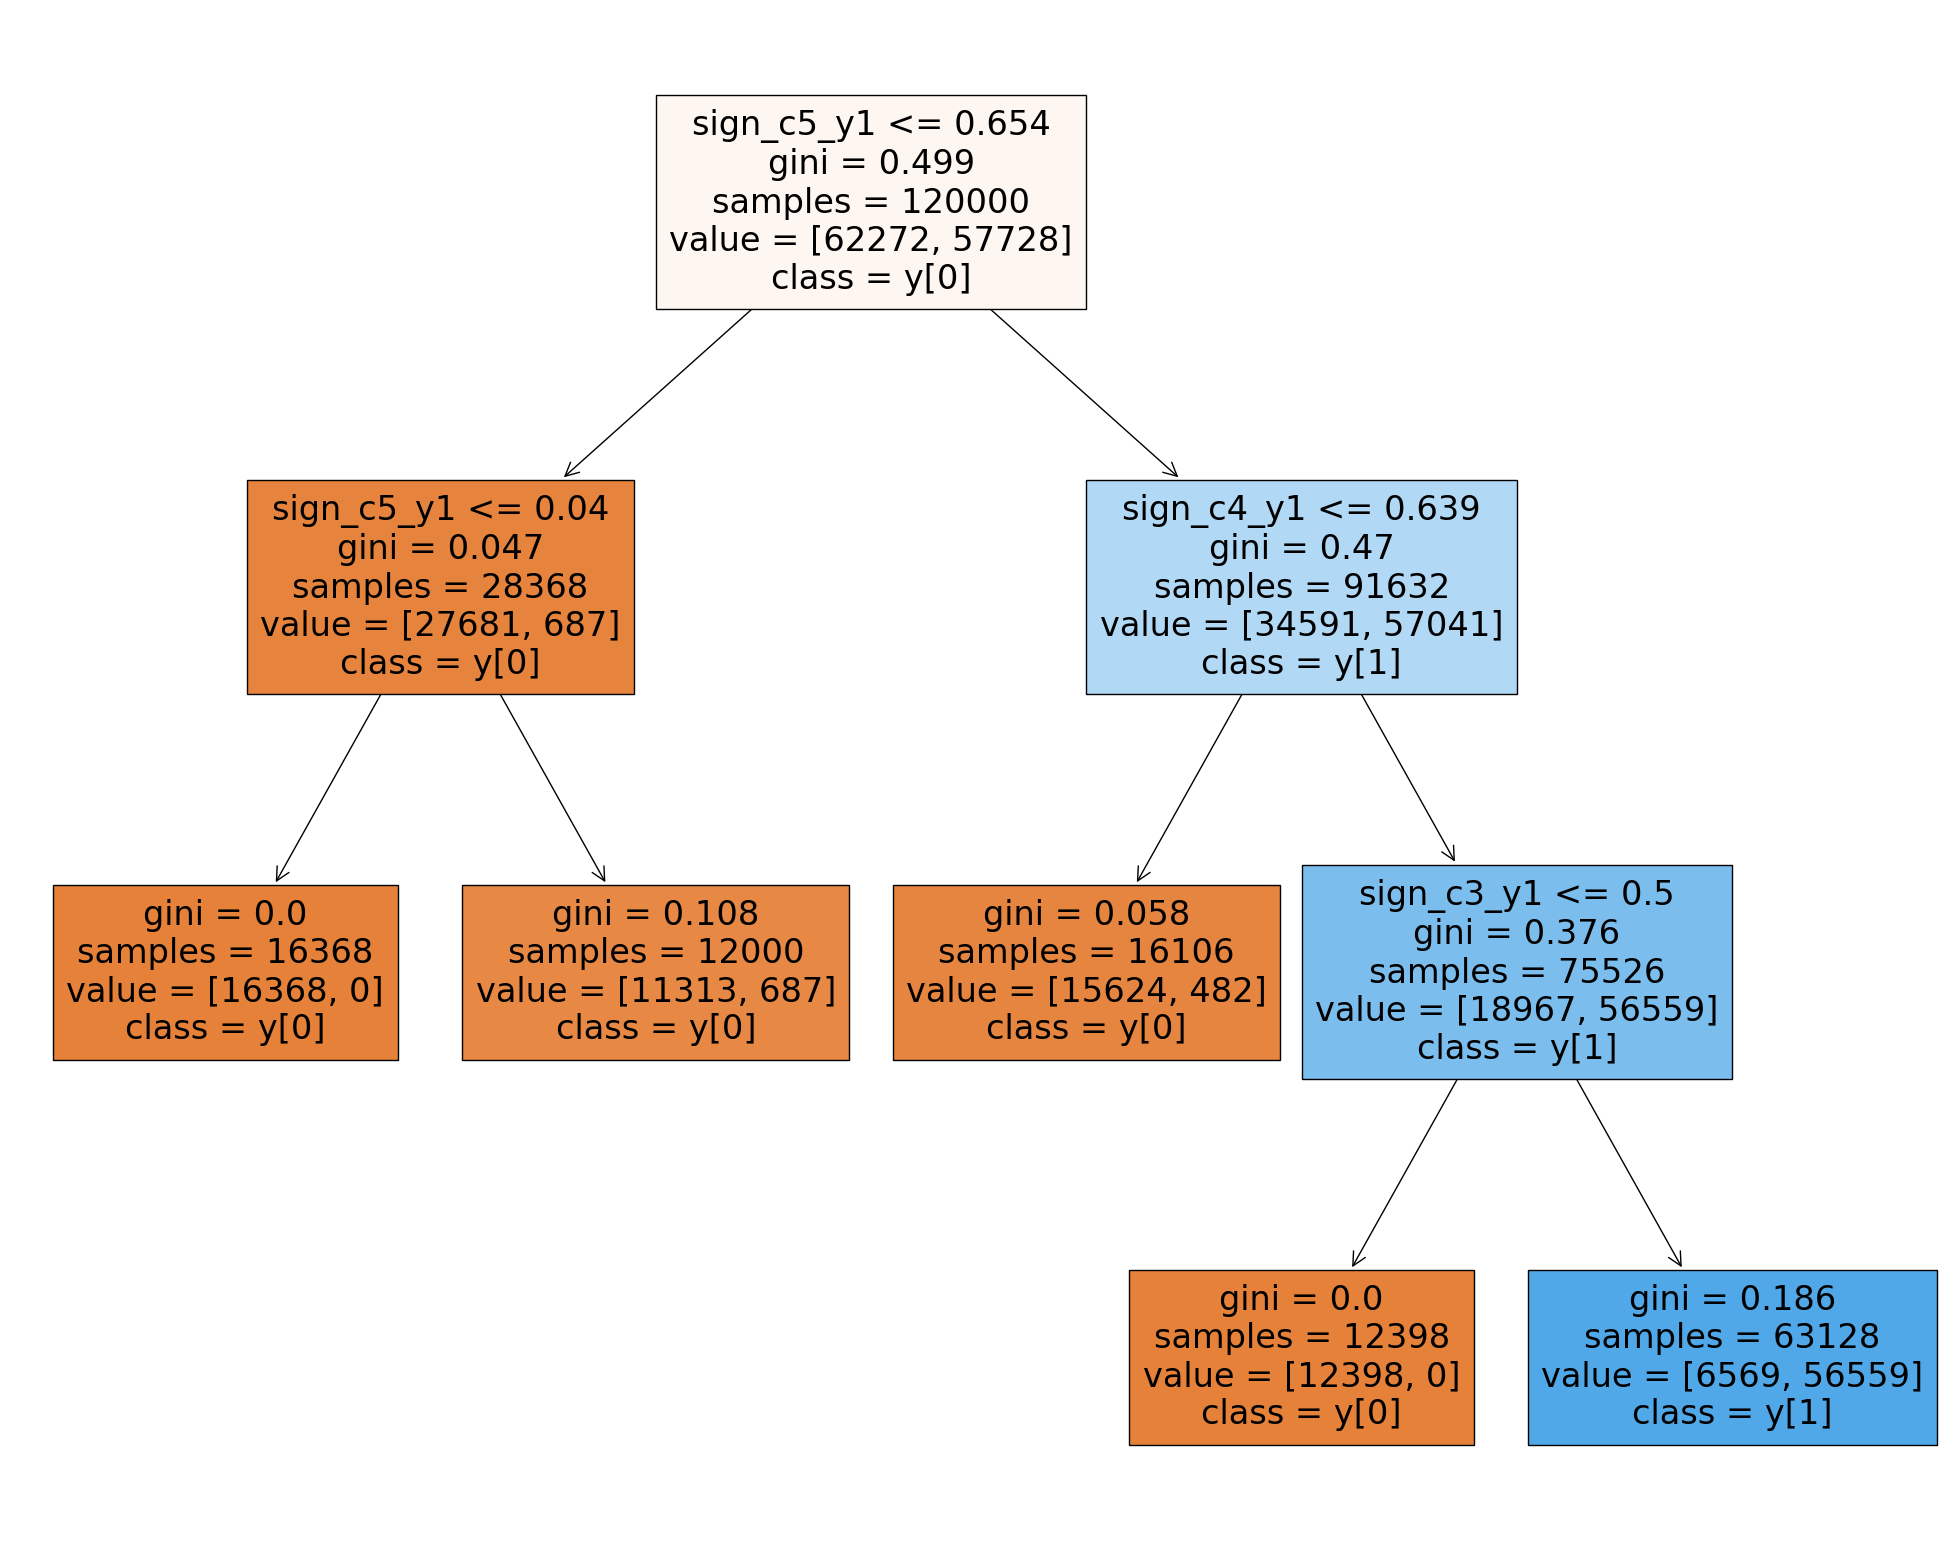

In [64]:
from decision_tree_explain import explain_with_DT

# 1 DT for both classes
clf_funct = explain_with_DT(x_train, concept_encoder, task_predictor)

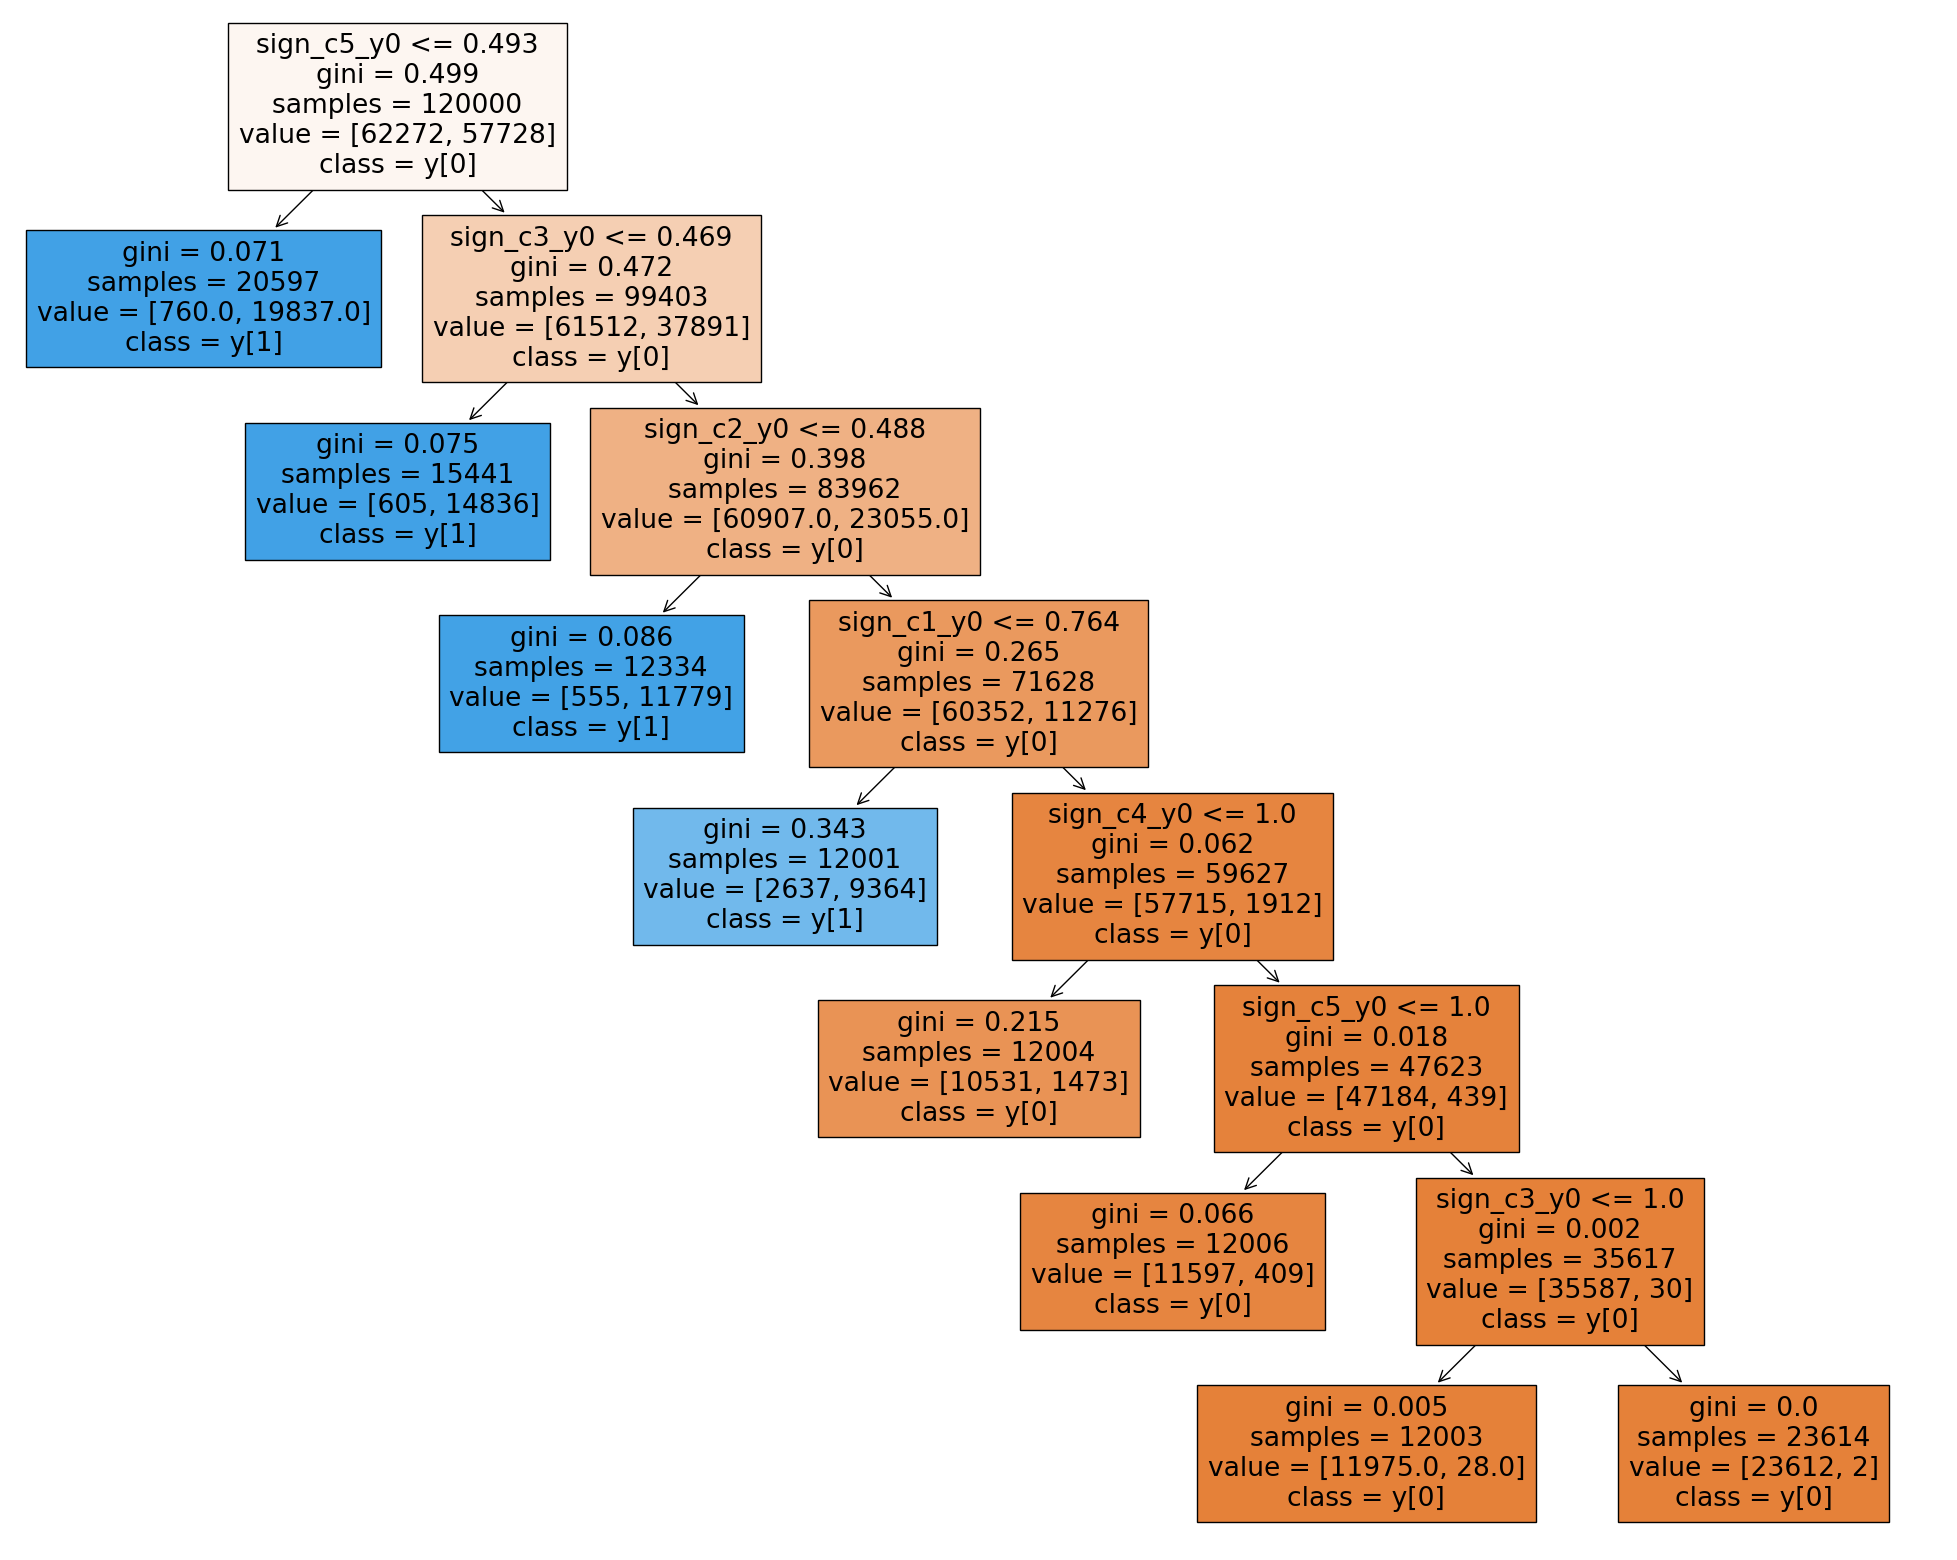

[-1, -1]
[0.764, -1]
[0.488, -1]
[0.469, -1]
[-1, 1.0]
[0.493, -1]
[-1, -1]
[0.764, -1]
[0.488, -1]
[0.469, -1]
[1.0, -1]
[0.493, 1.0]
[-1, -1]
[0.764, -1]
[0.488, -1]
[0.469, 1.0]
[1.0, -1]
[1.0, -1]
[-1, -1]
[0.764, -1]
[0.488, -1]
[1.0, -1]
[1.0, -1]
[1.0, -1]
c1 & c2 & c3 & ~c4 & c5|c1 & c2 & c3 & c4 & c5|c1 & c2 & c3 & c4 & c5|c1 & c2 & c3 & c4 & c5
c1 & c2 & c3 & c5


In [65]:
# DT for class 0
clf_funct_0 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=0, max_depth=c_pred.size(1)+1)

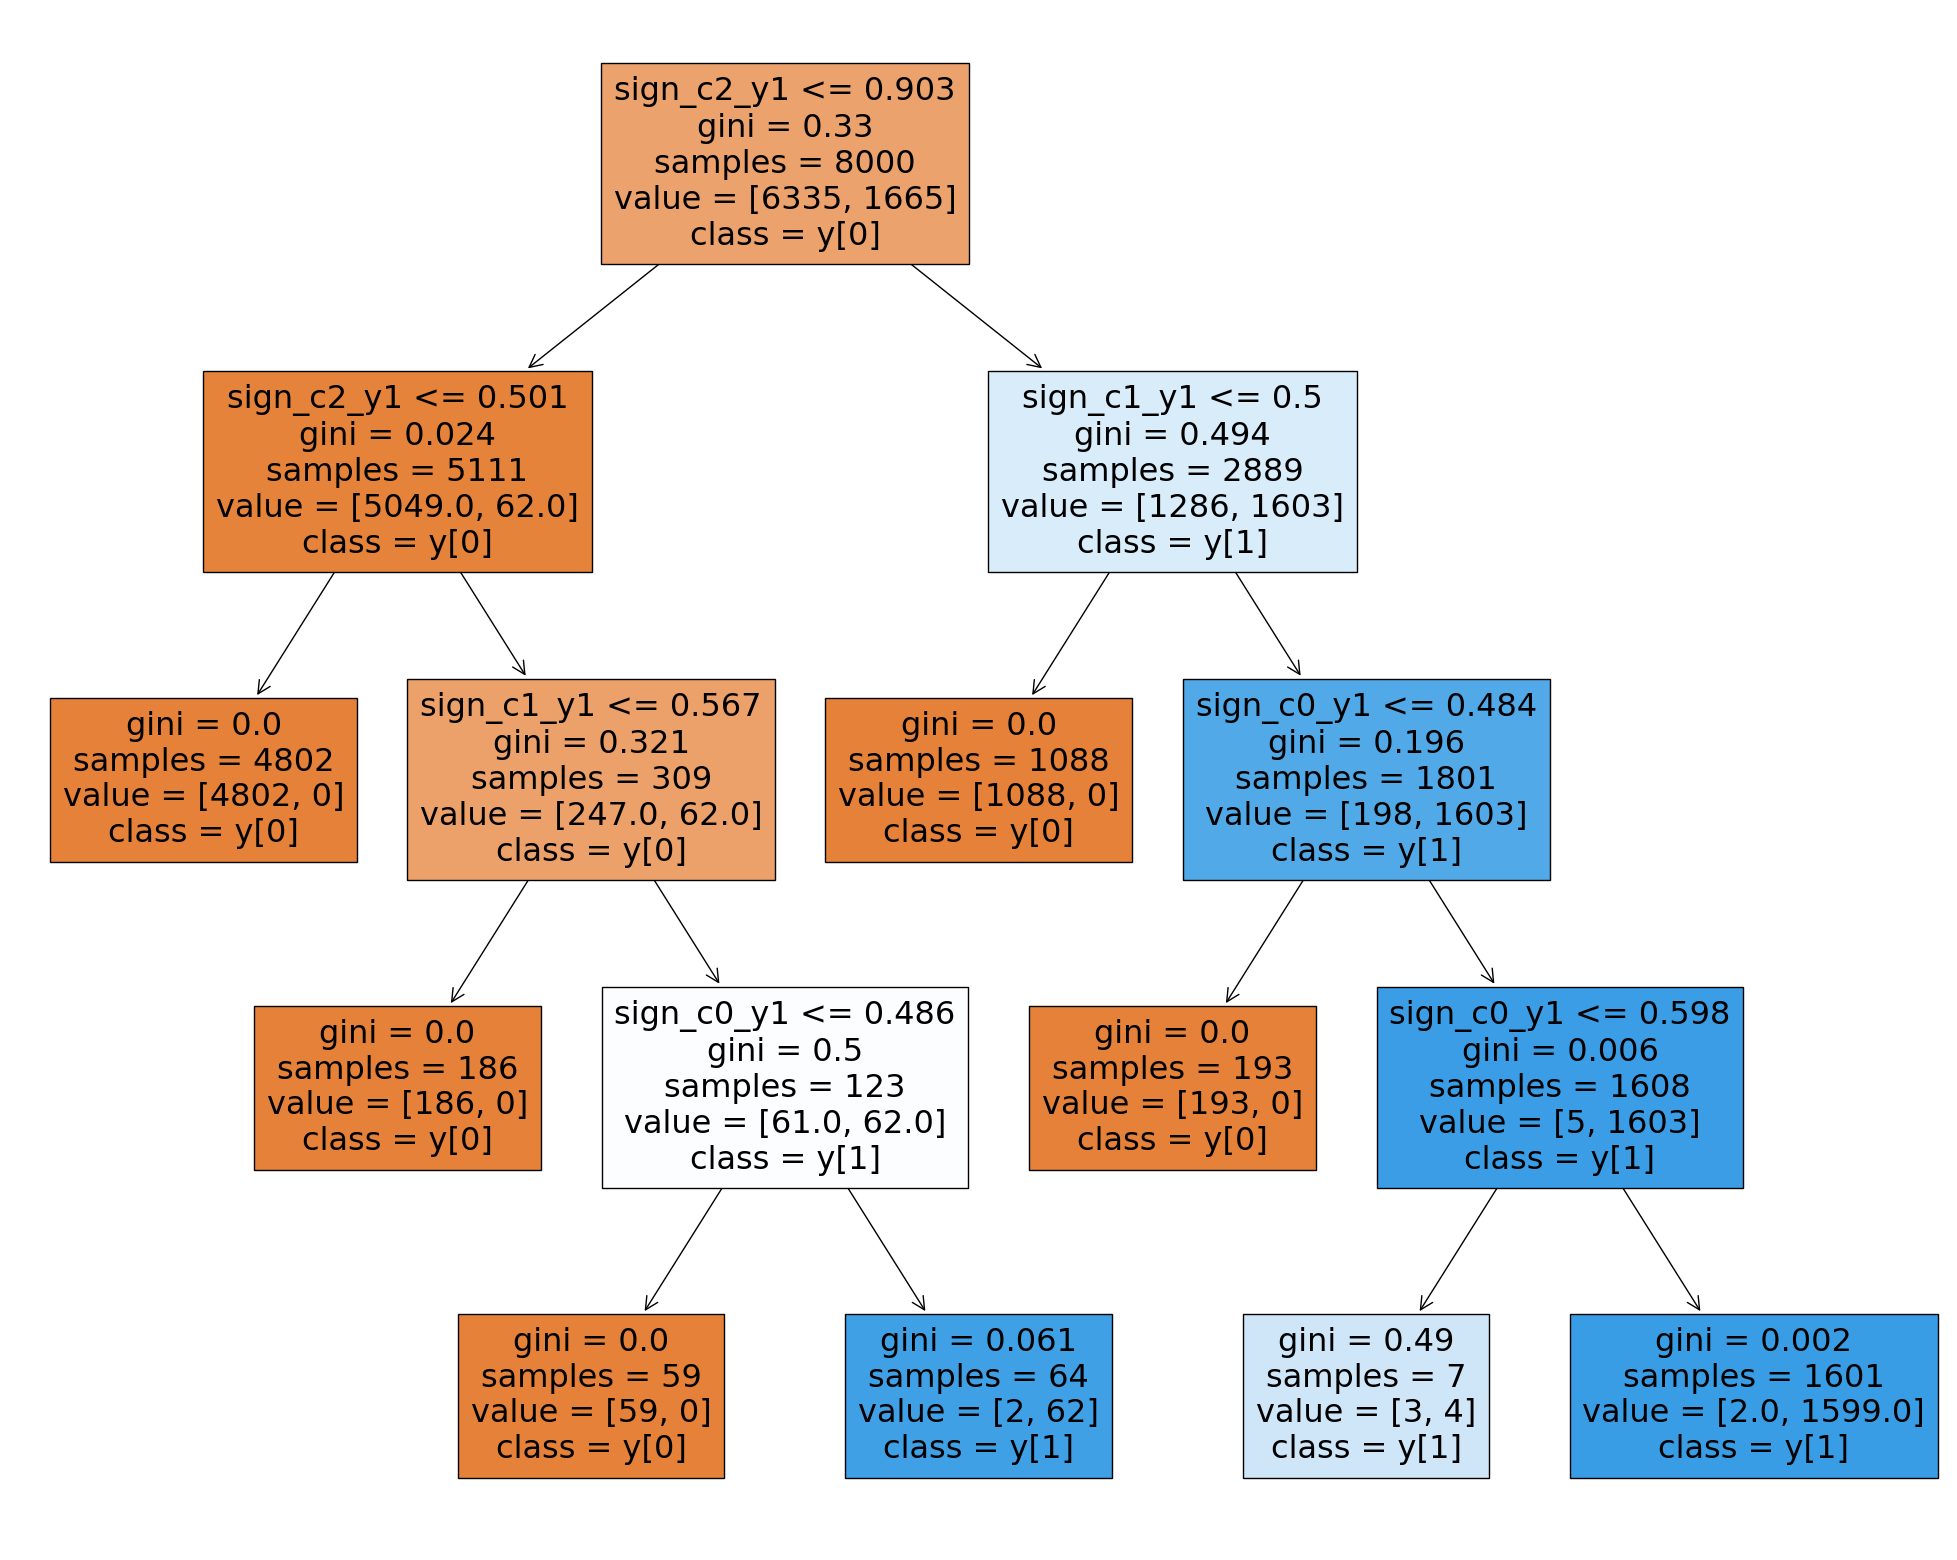

[-1, -1]
[-1, -1]
[-1, 0.501]
[-1, -1]
[-1, 0.567]
[0.501, 0.903]
[-1, 0.486]
[0.567, -1]
[0.501, 0.903]
[-1, -1]
[-1, 0.5]
[0.903, -1]
[-1, 0.484]
[0.5, -1]
[0.903, -1]
~c2|~c1 & c2|~c0 & c1 & c2|~c1 & c2|~c0 & c1 & c2
~c0 | ~c1 | ~c2


In [25]:
# DT for class 1
clf_funct_1 = explain_with_DT(x_train, concept_encoder, task_predictor, mode='distinct', target_class=1, max_depth=c_pred.shape[1]+1)